# Modeling Assignment - Swire Capstone - Group 2 

# Table of Contents
1. [Introduction](#Introduction)
2. [Loading Libraries](#Loading_Libraries)
3. [Loading Datasets and Data Description](#Loading_Datasets_and_Data_Description)
    * 3.1.[Consumer Demographics Data](#Consumer_Demographics_data)
    * 3.2.[Fact Market Demand Data](#Fact_Market_Demand_data)
    * 3.3.[Zipcode to MarketKey Data](#Zipcode_to_MarketKey_data)
4. [Exploring the data columns](#Explore_data_columns)
     * 4.1.[Distribution of drink categories](#Dist_drink_cat)
     * 4.2.[Top 20 packages by sales](#top_20_pack_sales)
     * 4.3.[Relationship between Unit Sales and Dollar Sales by Manufacturer](#unit_dollar_manu)
     * 4.4.[Average Unit Sales by Manufacturer](#avg_unitsales_manu)
     * 4.5.[Caloric segment Distribution](#cal_seg_dist)
     * 4.6.[Total Dollar Sales by Category](#dollar_sales_cat)
     * 4.7.[Mean Unit Sales by Category](#"mean_unit_sales_cat)
     * 4.8.[Caloric segment Vs. Category Distribution](#Cal_seg_cat_dist)
5. [Joining datasets and Target variable exploration](#join_data_target_explore)
     * 5.1.[Top 10 zipcodes by Unitsales](#top10_zip_unitsales)
     * 5.2.[Top Brand by Units Sold](#top_brands_units_sold)
     * 5.3.[Seasonality of Sales](#sales_seasonality")
6. [Correlation](#correlation)
7. [Missing Data and Imputation](#missing_data)
8. [Outliers analysis](#outliers)
9. [Modeling](#Modeling)
   * 9.1.[Random Forest](#Random_Forest) 
   * 9.2.[XG Boost](#xgboost)
   * 9.3.[Model Performance Review](#model_performance_review)
       * 9.3.1.[RMSE and MAE](#rmse_and_mae)
       * 9.3.2.[Execution Time](#execution_time)
       * 9.3.3.[R-Squared](#r_squared)
       * 9.3.4.[Train and Test Set Performance](#train_and_test_set_performance)
10. [Business Problems and Results](#business_problems_and_results)
11. [Team member's Contributions](#contri)

## 1. Introduction <a id='Introduction'></a>


Swire Coca-Cola, a leading beverage manufacturer, faces the challenge of accurately forecasting the demand for its innovative products in order to optimize production planning and inventory management. With the beverage industry constantly evolving due to changing consumer preferences, technological advancements, and increasing emphasis on sustainability and health, launching innovative products is crucial for revenue growth and market competitiveness.
The goal is to develop a reliable forecast model that predicts the demand for Swire's innovation products at the weekly level. This involves leveraging historical data for similar products, incorporating relevant census data to derive insightful business conclusions such as identifying ideal locations or demographics for different products, and considering factors like seasonality, trends, and other influencers.

Specifically, the project aims to answer questions such as:

1. Which weeks of the year would each innovation product perform best in the market, and what is the forecasted demand for those weeks?
2. What will be the forecasted demand for products with specific release timelines, such as before or after Easter?
3. What will be the forecasted demand in those regions for products with regional releases?
4. Based on consumer demographics data, what are the ideal locations or demographics for each product?

The first step is to check the data provided and then do the Exploratory Data Analysis(EDA) to understand the data and its complexities. Then, we will move forward to clean the data so that the data will be ready for applying the models. There are several steps for cleaning data. One step is appropriately treating the Null values present, like using the imputation method with ‘median’ and ‘mode’ according to the data types. Another step is to correct the values like outliers. By completing all these steps, we can ensure the data is cleaned and ready to be fitted in Prediction models. 

In alignment with the CRISP-DM framework, we shall proceed to deepen our understanding of the data, informed by the initial business problem exploration. Next, we'll advance to the model development stage, where we'll deploy and evaluate a suite of machine learning models. The aim is to identify the top-performing model that will enable us to respond to the aforementioned questions and accurately forecast demand.


## 2. Loading Libraries<a id='Loading_Libraries'></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# setting figure size for the notebook
sns.set(rc={'figure.figsize':(15,6)})

## 3. Loading Datasets and Data description<a id='Loading_Datasets_and_Data_Description'></a>

### 3.1 Consumer Demographics Data <a name = "Consumer_Demographics_data"></a>

In [6]:
# demoDF = pd.read_excel('consumer_demographics.xlsx')
demoDF = pd.read_excel('consumer_demographics.xlsx', sheet_name='Data')

demoDF.head(10)

,Geography Name,Zip,City,State,Segment,Criteria,Count,Criteria_Unit
0,"85281 Tempe, AZ",85281,Tempe,AZ,Household Income,"Income Under $10,000",3628,HHs
1,"85705 Tucson, AZ",85705,Tucson,AZ,Household Income,"Income Under $10,000",3299,HHs
2,"85364 Yuma, AZ",85364,Yuma,AZ,Household Income,"Income Under $10,000",2852,HHs
3,"85301 Glendale, AZ",85301,Glendale,AZ,Household Income,"Income Under $10,000",2425,HHs
4,"85719 Tucson, AZ",85719,Tucson,AZ,Household Income,"Income Under $10,000",2305,HHs
5,"85716 Tucson, AZ",85716,Tucson,AZ,Household Income,"Income Under $10,000",1811,HHs
6,"86505 Ganado, AZ",86505,Ganado,AZ,Household Income,"Income Under $10,000",1736,HHs
7,"85710 Tucson, AZ",85710,Tucson,AZ,Household Income,"Income Under $10,000",1582,HHs
8,"85706 Tucson, AZ",85706,Tucson,AZ,Household Income,"Income Under $10,000",1500,HHs
9,"85009 Phoenix, AZ",85009,Phoenix,AZ,Household Income,"Income Under $10,000",1478,HHs


In [3]:
demoDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491400 entries, 0 to 491399
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Geography Name  491400 non-null  object
 1   Zip             491400 non-null  int64 
 2   City            491400 non-null  object
 3   State           491400 non-null  object
 4   Segment         491400 non-null  object
 5   Criteria        491400 non-null  object
 6   Count           491400 non-null  int64 
 7   Criteria_Unit   491400 non-null  object
dtypes: int64(2), object(6)
memory usage: 30.0+ MB


In [4]:
print('Shape of the demographic file:', demoDF.shape)

Shape of the demographic file: (491400, 8)


demoDF has 491400 rows and 8 columns

In [5]:
demoDF.dtypes

Geography Name    object
Zip                int64
City              object
State             object
Segment           object
Criteria          object
Count              int64
Criteria_Unit     object
dtype: object

In [6]:
demoDF.columns

Index(['Geography Name', 'Zip', 'City', 'State', 'Segment', 'Criteria',
       'Count', 'Criteria_Unit'],
      dtype='object')

### 3.2 Fact Market Demand Data <a name = "Fact_Market_Demand_data"></a>

In [7]:
# reading in the parquet file
parquetDF = pd.read_parquet('FACT_MARKET_DEMAND.parquet')
parquetDF.head(10)

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM
0,2021-08-21,524,DIET/LIGHT,SSD,69.0,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...
1,2022-05-07,637,REGULAR,SSD,4.0,30.96,COCOS,GORGEOUS ORANGEOUS,12SMALL 12ONE CUP,GORGEOUS SUNSET OUS GENTLE DRINK AVOCADO CUP ...
2,2022-10-22,628,DIET/LIGHT,ING ENHANCED WATER,1.0,2.25,JOLLYS,DIGRESS FLAVORED,20SMALL MULTI JUG,DIGRESS ZERO NUTRIENT ENHANCED WATER BVRG PURP...
3,2022-08-13,216,REGULAR,SSD,3.0,7.55,COCOS,CHERRY FIZZ,1L MULTI JUG,KOOL! RED GENTLE DRINK RED COLA CONTOUR JUG ...
4,2022-01-01,210,REGULAR,SSD,4.0,25.96,COCOS,RADIANT'S,12SMALL 12ONE CUP,RADIANT'S GENTLE DRINK GINGER ALE CUP 12 LIQUI...
5,2021-11-27,278,REGULAR,SSD,112.0,179.00,SWIRE-CC,ROOT BEER WONDER,2L MULTI JUG,JUMPIN JACKS GENTLE DRINK ROOT BEER JUG 67.6 L...
6,2022-03-19,220,DIET/LIGHT,SPARKLING WATER,21.0,77.61,JOLLYS,BUBBLE JOY,12SMALL 8ONE CUP,BUBBLE JOY SPARKLING WATER RAZZ BUBBLE JOY NO...
7,2021-11-27,499,DIET/LIGHT,SSD,3.0,10.00,JOLLYS,HILL MOISTURE ZERO SUGAR,.5L 6ONE JUG,RAINING ZERO SUGAR GENTLE DRINK AVOCADO ZERO ...
8,2021-07-17,754,DIET/LIGHT,SSD,19.0,96.67,JOLLYS,PAPI ZERO SUGAR CHERRY,12SMALL 12ONE CUP,WILD RED PAPI GENTLE DRINK WILD RED COLA CUP...
9,2022-04-02,895,REGULAR,SSD,57.0,173.33,JOLLYS,HILL MOISTURE MAJOR MELON,.5L 6ONE JUG,RAINING GENTLE DRINK MAJOR CANES AVOCADO JUG...


In [8]:
# looking at the shape of the file
print("Shape of the Parquet file:", parquetDF.shape)

Shape of the Parquet file: (24461424, 10)


In [9]:
# Convert the 'DATE' column to datetime
parquetDF['DATE'] = pd.to_datetime(parquetDF['DATE'], format='%Y-%m-%d')

# Check the DataFrame info again to confirm the change
parquetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24461424 entries, 0 to 24461423
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   DATE             datetime64[ns]
 1   MARKET_KEY       int64         
 2   CALORIC_SEGMENT  object        
 3   CATEGORY         object        
 4   UNIT_SALES       float64       
 5   DOLLAR_SALES     float64       
 6   MANUFACTURER     object        
 7   BRAND            object        
 8   PACKAGE          object        
 9   ITEM             object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 1.8+ GB


The 'DATE' column is appropriately formatted as datetime format and can be used for further product analysis.

In [10]:
parquetDF.shape

(24461424, 10)

Parquet DF is huge dataset with 24461424 rows and 10 columns.

In [11]:
parquetDF.dtypes

DATE               datetime64[ns]
MARKET_KEY                  int64
CALORIC_SEGMENT            object
CATEGORY                   object
UNIT_SALES                float64
DOLLAR_SALES              float64
MANUFACTURER               object
BRAND                      object
PACKAGE                    object
ITEM                       object
dtype: object

In [12]:
parquetDF.columns

Index(['DATE', 'MARKET_KEY', 'CALORIC_SEGMENT', 'CATEGORY', 'UNIT_SALES',
       'DOLLAR_SALES', 'MANUFACTURER', 'BRAND', 'PACKAGE', 'ITEM'],
      dtype='object')

In [13]:
brand_value_counts = parquetDF['BRAND'].value_counts()

display(brand_value_counts)

BRAND
CROWN                                  1239010
REAL-TIME EDITIONS                      827868
DIGRESS FLAVORED                        731199
MYTHICAL BEVERAGE ULTRA                 718536
BUBBLE JOY                              535030
                                        ...   
PAPI VANILLA REAL SUGAR                      1
LAUGHING MYTHICAL BEVERAGE CHAI HAI          1
TIPCAL CANARY TWISTER SODA                   1
MIST TWST NAT CBRY                           1
VAULTLESS                                    1
Name: count, Length: 319, dtype: int64

The output shows the distribution of brands in the dataset, allowing us to identify the prevalence of each brand based on the count of occurrences. Notably, 'CROWN' stands out as the most frequent brand, appearing 1,239,010 times, followed closely by 'REAL-TIME EDITIONS' with 827,868 occurrences.

Moreover, the length value indicates that there are a total of 319 unique brands present in the dataset.

### 3.3 Zipcode to MarketKey Data <a name = "Zipcode_to_MarketKey_data"></a>

In [7]:
zipmap = pd.read_csv('zip_to_market_unit_mapping.csv')

zipmap.head(5)

,ZIP_CODE,MARKET_KEY
0,57714,161
1,57772,161
2,67701,1135
3,67740,1135
4,67748,1135


In [15]:
zipmap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382 entries, 0 to 2381
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ZIP_CODE    2382 non-null   int64
 1   MARKET_KEY  2382 non-null   int64
dtypes: int64(2)
memory usage: 37.3 KB


In [16]:
zipmap.shape

(2382, 2)

Zipmap DF has 2382 rows and 2 columns.

In [17]:
zipmap.dtypes

ZIP_CODE      int64
MARKET_KEY    int64
dtype: object

In [18]:
zipmap.columns

Index(['ZIP_CODE', 'MARKET_KEY'], dtype='object')

In [19]:
min_date = parquetDF['DATE'].min()
max_date = parquetDF['DATE'].max()

print("Minimum Date: ", min_date)
print("Maximum Date: ", max_date)

Minimum Date:  2020-12-05 00:00:00
Maximum Date:  2023-10-28 00:00:00


The minimum date in the dataset is December 5, 2020, and the maximum date is October 28, 2023.

## 4. Exploring the data columns<a id='Explore_data_columns'></a>

In [20]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

parquetDF.describe()

,DATE,MARKET_KEY,UNIT_SALES,DOLLAR_SALES
count,24461424,24461424.00,24461424.00,24461424.00
mean,2022-04-25 16:08:55.221432320,593.14,174.37,591.14
min,2020-12-05 00:00:00,1.00,0.04,0.01
25%,2021-08-14 00:00:00,260.00,11.00,36.59
50%,2022-04-23 00:00:00,547.00,40.00,135.05
75%,2022-12-31 00:00:00,845.00,126.00,427.14
max,2023-10-28 00:00:00,6802.00,96776.00,492591.07
std,NaN,605.88,857.81,3040.54


The above table shows the aggregate functions like min,max,mean for each column.

In [21]:
min_unit_sales_index = parquetDF['UNIT_SALES'].idxmin()
min_unit_sales_row = parquetDF.loc[min_unit_sales_index]

min_unit_sales_row

DATE                                             2023-10-14 00:00:00
MARKET_KEY                                                       484
CALORIC_SEGMENT                                           DIET/LIGHT
CATEGORY                                                      ENERGY
UNIT_SALES                                                      0.04
DOLLAR_SALES                                                    2.00
MANUFACTURER                                                   ALLYS
BRAND                                                 REAL-TIME ZERO
PACKAGE                                             8SMALL 24ONE CUP
ITEM               REAL-TIME ZERO ENERGY DRINK UNFLAVORED ZERO SU...
Name: 25460, dtype: object

The row with the minimum unit sales corresponds to a record where the unit sales for the item are 0.04, resulting in $2.00 in dollar sales. The manufacturer of this item is 'ALLYS', and the brand associated with it is 'REAL-TIME ZERO'.

In [22]:
min_dollar_sales_index = parquetDF['DOLLAR_SALES'].idxmin()
min_dollar_sales_row = parquetDF.loc[min_dollar_sales_index]

min_dollar_sales_row

DATE                                         2021-12-11 00:00:00
MARKET_KEY                                                  1172
CALORIC_SEGMENT                                          REGULAR
CATEGORY                                                     SSD
UNIT_SALES                                                  1.00
DOLLAR_SALES                                                0.01
MANUFACTURER                                            SWIRE-CC
BRAND                                                      SMASH
PACKAGE                                        16SMALL MULTI CUP
ITEM               SMASH GENTLE DRINK PINK  CUP 16 LIQUID SMALL 
Name: 3592, dtype: object

The row with the minimum dollar sales corresponds to a record where the unit sales for the item are 1.00, resulting in a minimal dollar sales value of $0.01. The manufacturer of this item is 'SWIRE-CC', and the brand associated with it is 'SMASH'.

In [23]:
print('Number of duplicate rows: ', parquetDF.duplicated().sum())

Number of duplicate rows:  0


The dataset does not contain any duplicate entries.

In [24]:
print(parquetDF.isnull().sum())

DATE                   0
MARKET_KEY             0
CALORIC_SEGMENT    59725
CATEGORY               0
UNIT_SALES             0
DOLLAR_SALES           0
MANUFACTURER           0
BRAND                  0
PACKAGE                0
ITEM                   0
dtype: int64


In [25]:
# Create new features from 'DATE'
parquetDF['YEAR'] = parquetDF['DATE'].dt.year
parquetDF['MONTH'] = parquetDF['DATE'].dt.month
parquetDF['DAY'] = parquetDF['DATE'].dt.day
parquetDF['DAY_OF_WEEK'] = parquetDF['DATE'].dt.dayofweek


Extracted the year, month, day, and day of the week information from the dates and assigned them to new columns in the DataFrame.

### 4.1 Distribution of drink categories <a name = "Dist_drink_cat"></a>

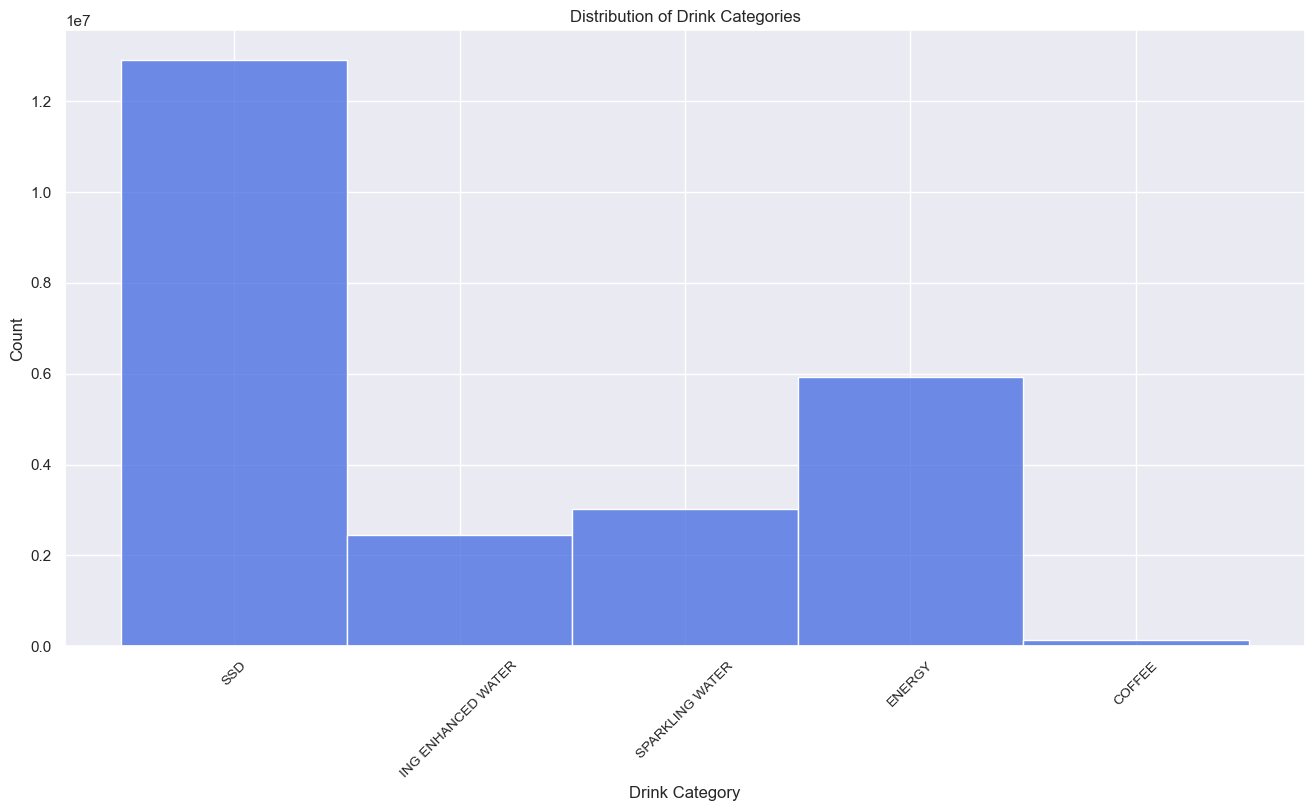

In [26]:
fig, ax = plt.subplots(figsize=(16, 8))

# Use a different color (e.g., a shade of blue) and adjust the bin size using the `binwidth` parameter
sns.histplot(data=parquetDF, x='CATEGORY', color='royalblue', binwidth=0.2)

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, fontsize=10)

# Set custom axis labels
ax.set_xlabel('Drink Category')
ax.set_ylabel('Count')

# Set plot title
plt.title('Distribution of Drink Categories')

# Show the plot
plt.show()


The histogram displays the distribution of drink categories in the dataset. The category 'SSD' (Sugared Soft Drinks) has the highest count, dominating the distribution with significantly more occurrences than other categories. The 'ENERGY' category is the second most common, followed by 'SPARKLING WATER' and 'ING ENHANCED WATER', both of which have considerably lower counts. 'COFFEE' has the fewest counts, indicating it is the least common among the categories analyzed.

### 4.2 Top 20 packages by sales <a name = "top_20_pack_sales"></a>

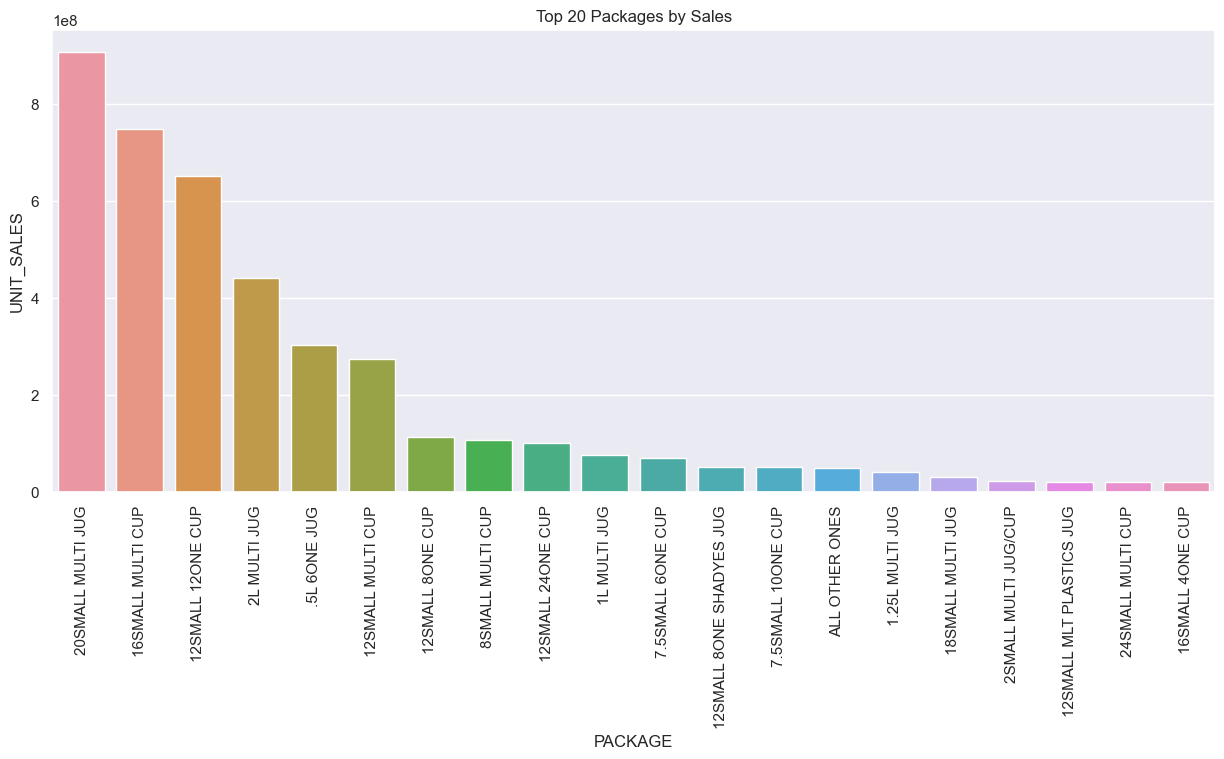

In [27]:
# UNIT_SALES by PACKAGE

# plt.style.use('seaborn-whitegrid')

# Aggregate data to get total UNIT_SALES for each PACKAGE
agg_df = parquetDF.groupby('PACKAGE')['UNIT_SALES'].sum().reset_index()

# Sort by UNIT_SALES and select top 20
top_20_df = agg_df.sort_values('UNIT_SALES', ascending=False).head(20)

# Create the bar chart
sns.barplot(x='PACKAGE', y='UNIT_SALES', data=top_20_df, errorbar=None)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add title
plt.title("Top 20 Packages by Sales")

# Show the plot
plt.show()

The bar chart illustrates the unit sales for the top 20 beverage packages. The '20SML MULTI JUG' is the most popular, with the highest unit sales, followed by '16SML MULTI CUP' and '12SML MULTI JUG'. There is a significant drop in sales after the top two packages, indicating a strong preference or higher demand for these package types. The variety of package types in the top 20 suggests a diverse market with different consumer preferences.

### 4.3 Relationship between Unit Sales and Dollar Sales by Manufacturer<a name = "unit_dollar_manu"></a>

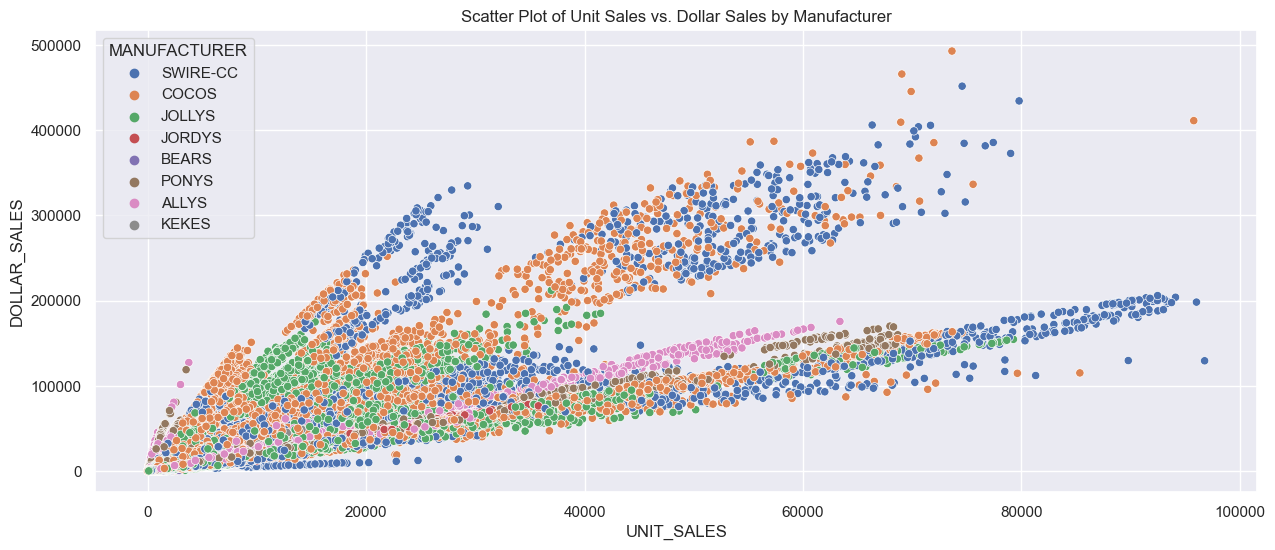

In [28]:
sns.scatterplot(x="UNIT_SALES", y="DOLLAR_SALES", hue="MANUFACTURER", data=parquetDF)
# Add title
plt.title('Scatter Plot of Unit Sales vs. Dollar Sales by Manufacturer')
plt.show()

The scatter plot shows the relationship between unit sales and dollar sales for various manufacturers. For instance, SWIRE-CC, represented by the blue dots, shows a broad distribution across both axes, indicating a diverse range of products with varying sales volumes and revenue. JOLLYS (green dots) also has a wide spread, but with many data points clustered at the lower end of dollar sales, suggesting a focus on products that sell in high volume but may have lower prices. In contrast, manufacturers like COCOS and JORDYS (orange and red dots, respectively) have data points that suggest specialization in products with higher revenue per unit, indicating a focus on premium or higher-priced offerings. The scatter plot underscores the varying market strategies and product portfolios of these manufacturers.

### 4.4 Average Unit Sales by Manufacturer<a name = "avg_unitsales_manu"></a>

In [29]:
# Set 'DATE' as the index to enable resampling
parquetDF.set_index('DATE', inplace=True)

# Resample 'UNIT_SALES' to get the weekly average for each 'MANUFACTURER'
smoothed_df = parquetDF.groupby('MANUFACTURER')['UNIT_SALES'].resample('W').mean().reset_index()

# Create the interactive line chart with the smoothed data
fig = px.line(smoothed_df, x="DATE", y="UNIT_SALES", color="MANUFACTURER")
fig.update_layout(title='Weekly Average Unit Sales by Manufacturer')
fig.show()

This plot shows the weekly average unit sales by various manufacturers over a time span from January 2021 to July 2023. SWIRE-CC (green line) consistently maintains high sales throughout the period, while other manufacturers like JOLLYS (purple line) and JORDYS (orange line) exhibit more fluctuation. The sharp peaks and troughs for certain manufacturers suggest periodic surges in sales, which could be due to seasonal influences, marketing campaigns, or other external events. The chart illustrates the competitive landscape in which these manufacturers operate and how their sales volumes compare week to week.

### 4.5 Caloric segment Distribution<a name = "cal_seg_dist"></a>

In [27]:
caloricsegment_value_counts = parquetDF['CALORIC_SEGMENT'].value_counts()
display(caloricsegment_value_counts)

CALORIC_SEGMENT
REGULAR       12231585
DIET/LIGHT    12170114
Name: count, dtype: int64

The output shows the count of occurrences for each category in the 'CALORIC_SEGMENT' column, indicating that 'REGULAR' has 12,231,585 occurrences and 'DIET/LIGHT' has 12,170,114 occurrences.

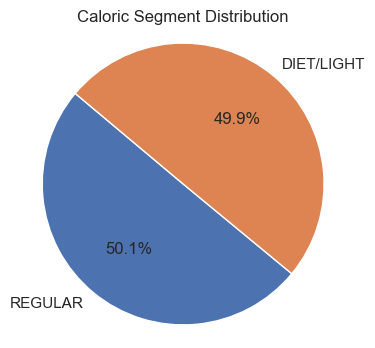

In [28]:
# Create a pie chart

segment_counts = parquetDF['CALORIC_SEGMENT'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Caloric Segment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

The pie chart illustrates a nearly equal distribution between the 'Regular' and 'Diet/Light' caloric segments of drinks, with 'Regular' having a slight edge at 50.1%, while 'Diet/Light' stands close behind at 49.9%. This nearly balanced split implies either a well-matched consumer preference or an evenly distributed market offering for both types of caloric segments within this dataset.

### 4.6 Total Dollar Sales by Category<a name = "dollar_sales_cat"></a>

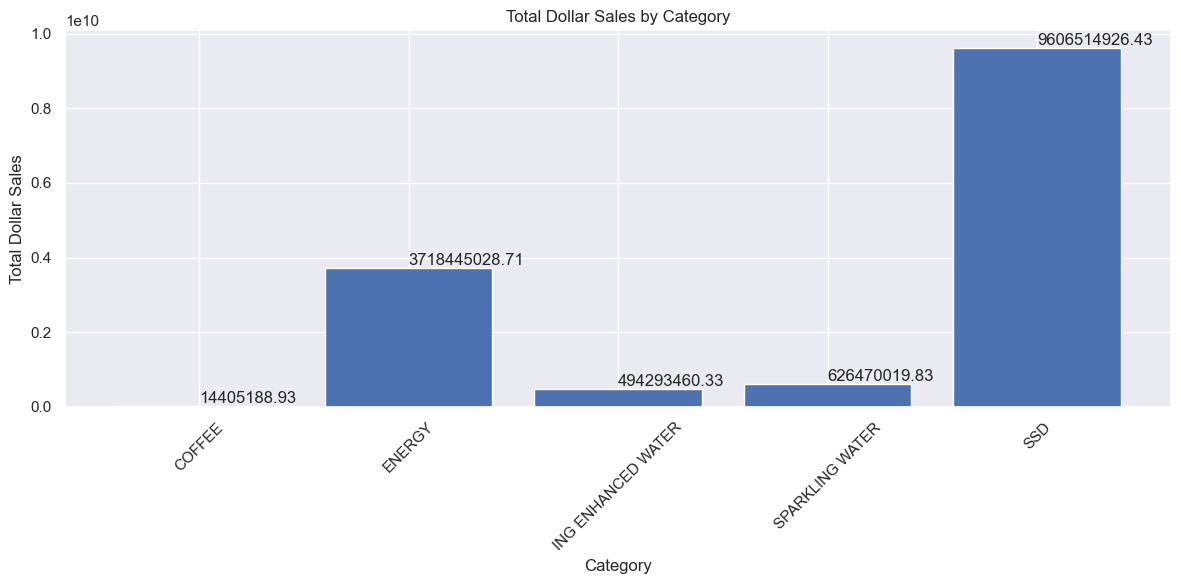

In [29]:
# Create a bar plot for dollar sales by category
category_sales = parquetDF.groupby('CATEGORY')['DOLLAR_SALES'].sum()

plt.figure(figsize=(12, 6))
bars = plt.bar(category_sales.index, category_sales.values)

# Add labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.title('Total Dollar Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Dollar Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


The bar chart depicts the total dollar sales across different beverage categories. 'SSD' (Sugared Soft Drinks) emerges as the frontrunner by a notable margin, indicating its dominance as the highest revenue-generating category. Following closely, 'SPARKLING WATER' claims the second-highest dollar sales, with 'ING ENHANCED WATER' trailing not far behind. 'ENERGY' drinks secure the fourth position, while 'COFFEE' ranks lowest in terms of dollar sales among the displayed categories. This highlights a pronounced market preference for sugared soft drinks in expenditure, while also showcasing significant sales for healthier alternatives like sparkling and enhanced water.

### 4.7 Mean Unit Sales by Category<a name = "mean_unit_sales_cat"></a>

In [26]:
parquetDF.groupby('CATEGORY')['UNIT_SALES'].mean()

CATEGORY
COFFEE                45.10
ENERGY               202.01
ING ENHANCED WATER    80.45
SPARKLING WATER       55.04
SSD                  208.87
Name: UNIT_SALES, dtype: float64

The average unit sales indicate that 'SSD' (Sugared Soft Drinks) and 'ENERGY' drinks have the highest mean unit sales at 208.87 and 202.01 respectively, while 'COFFEE' exhibits the lowest at 45.10.

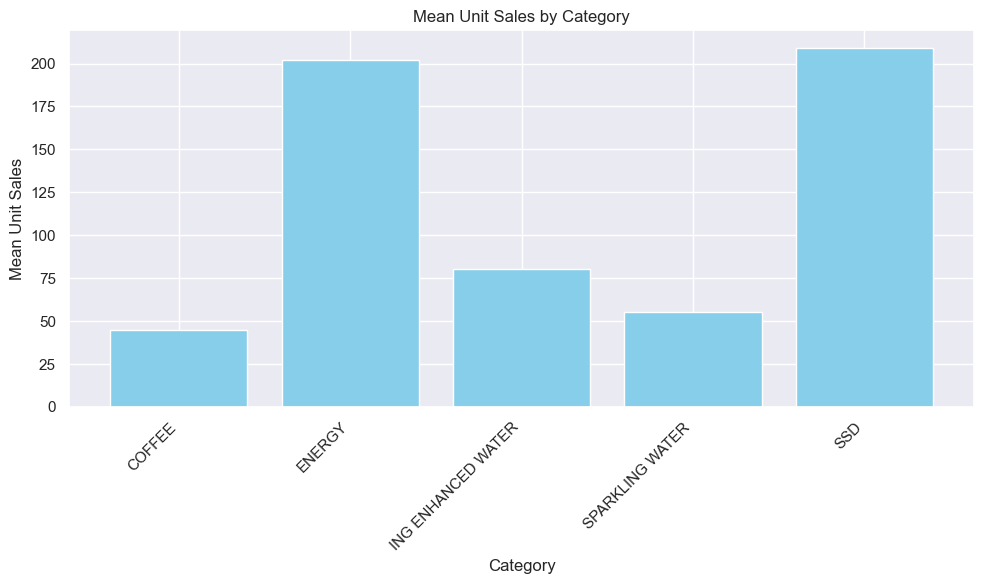

In [31]:
# Calculate mean unit sales for each category
mean_unit_sales = parquetDF.groupby('CATEGORY')['UNIT_SALES'].mean()

# Extract category names and mean unit sales values
categories = mean_unit_sales.index
unit_sales_values = mean_unit_sales.values

# Create a column chart for mean unit sales by category
plt.figure(figsize=(10, 6))
plt.bar(categories, unit_sales_values, color='skyblue')
plt.title('Mean Unit Sales by Category')
plt.xlabel('Category')
plt.ylabel('Mean Unit Sales')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better visibility
plt.tight_layout()
plt.show()

The plot displays the mean unit sales for different beverage categories, arranged in descending order. 'SSD' (Sugared Soft Drinks) exhibits the highest mean unit sales, followed by 'ENERGY' drinks.This ranking provides insights into the average sales volume per transaction across various beverage categories, highlighting the relative popularity or demand for each category.

### 4.8 Caloric segment Vs. Category Distribution<a name = "Cal_seg_cat_dist"></a>

In [32]:
pd.crosstab(parquetDF['CALORIC_SEGMENT'], parquetDF['CATEGORY'])

CATEGORY,COFFEE,ENERGY,ING ENHANCED WATER,SPARKLING WATER,SSD
CALORIC_SEGMENT,,,,,
DIET/LIGHT,33275,3142778,1973685,2986849,4033527
REGULAR,112261,2789301,478771,32215,8819037


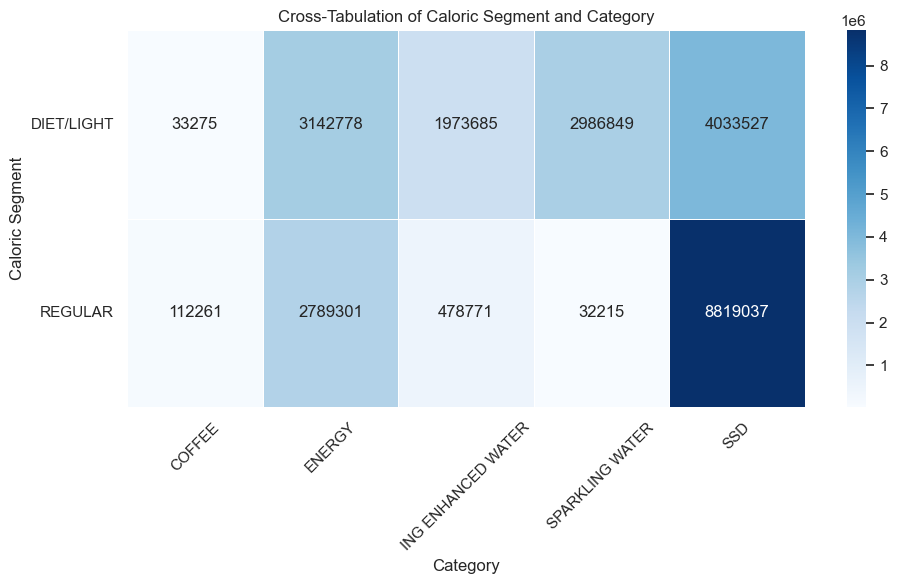

In [33]:
# Create cross-tabulation of caloric segment and category
cross_tab = pd.crosstab(parquetDF['CALORIC_SEGMENT'], parquetDF['CATEGORY'])

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d', linewidths=.5)
plt.title('Cross-Tabulation of Caloric Segment and Category')
plt.xlabel('Category')
plt.ylabel('Caloric Segment')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The heatmap illustrates the relationship between caloric segments and beverage categories. 'SSD' (Sugared Soft Drinks) predominates in the 'Regular' caloric segment, indicating significant sales volume. Although 'SSD' also appears in the 'Diet/Light' segment, the count is lower compared to its 'Regular' counterpart. Other categories such as 'COFFEE', 'ENERGY', 'ING ENHANCED WATER', and 'SPARKLING WATER' show smaller numbers in both segments. Interestingly, 'ENERGY' drinks exhibit a fairly even distribution between 'Diet/Light' and 'Regular'. This visualization provides insights into sales dynamics relative to caloric content across different beverage types.

## 5. Joining datasets and Target variable exploration <a id='join_data_target_explore'></a>

In [34]:
# Merge the fact table with the zip code to market key table
merged_df = pd.merge(parquetDF, zipmap, on='MARKET_KEY')

merged_df.head(5)

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM,YEAR,MONTH,DAY,DAY_OF_WEEK,ZIP_CODE
0,2021-08-21,524,DIET/LIGHT,SSD,69.00,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...,2021,8,21,5,85087
1,2021-08-21,524,DIET/LIGHT,SSD,69.00,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...,2021,8,21,5,85266
2,2021-08-21,524,DIET/LIGHT,SSD,69.00,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...,2021,8,21,5,85324
3,2021-08-21,524,DIET/LIGHT,SSD,69.00,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...,2021,8,21,5,85331
4,2021-08-21,524,DIET/LIGHT,SSD,69.00,389.74,SWIRE-CC,DIET YAWN,12SMALL 12ONE CUP,YAWN ZERO SUGAR GENTLE DRINK SUPER-JUICE DURI...,2021,8,21,5,85377


In [35]:
# Group by zip code and sum up the unit sales
zip_sales = merged_df.groupby('ZIP_CODE')['UNIT_SALES'].sum().reset_index()

# Get top zip codes with most unit sales
top_zip_sales = zip_sales.nlargest(10, 'UNIT_SALES')

top_zip_sales.head(10)

,ZIP_CODE,UNIT_SALES
10,66215,418534683.10
12,67217,349157444.95
11,66619,80935293.82
502,83201,59357239.12
503,83202,59357239.12
505,83204,59357239.12
506,83205,59357239.12
507,83209,59357239.12
511,83214,59357239.12
512,83217,59357239.12


### 5.1 Top 10 zipcodes by Unitsales<a name = "top10_zip_unitsales"></a>

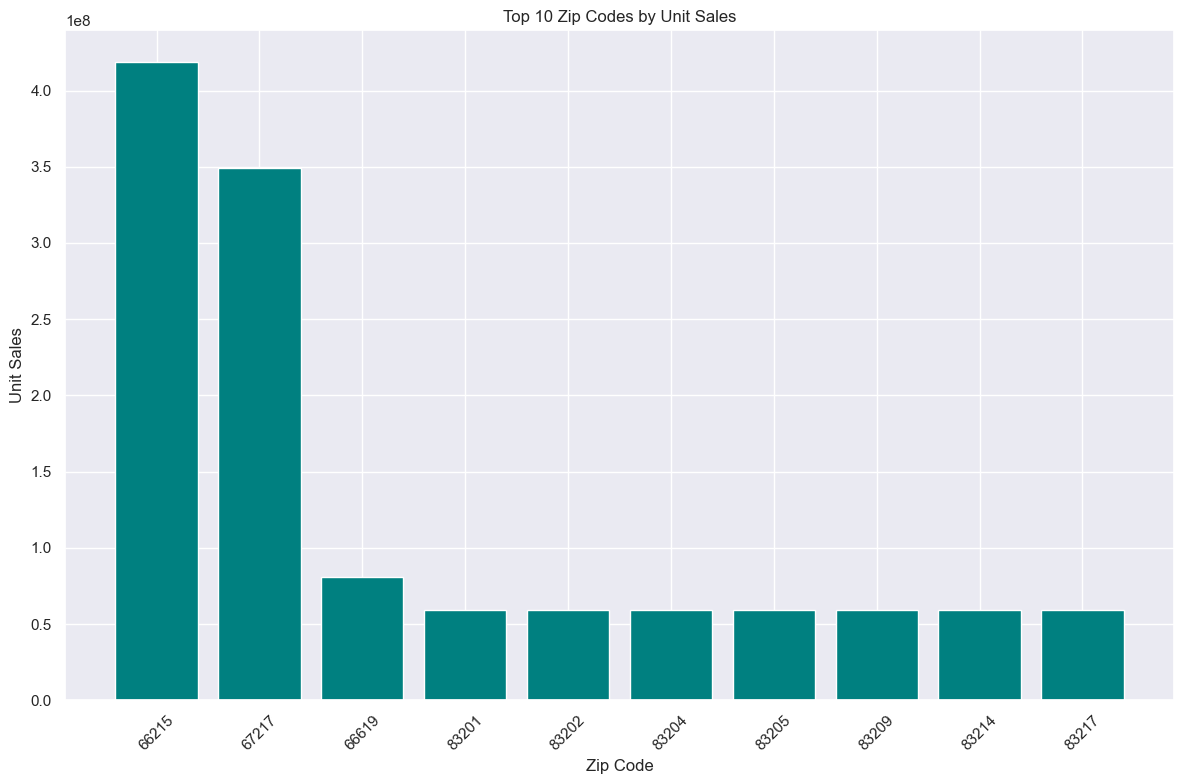

In [36]:
# Assuming top_zip_sales is already defined and sorted as per your requirement
# Plotting
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
plt.bar(top_zip_sales['ZIP_CODE'].astype(str), top_zip_sales['UNIT_SALES'], color='teal')
plt.title('Top 10 Zip Codes by Unit Sales')
plt.xlabel('Zip Code')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [37]:
# Group by brand and sum up the unit sales
brand_sales = merged_df.groupby('BRAND')['UNIT_SALES'].sum().reset_index()

# Get top brands as per units sold
top_brand_sales = brand_sales.nlargest(10, 'UNIT_SALES')

top_brand_sales.head(10)

,BRAND,UNIT_SALES
11,BUBBLE JOY ADVANTAGEOUS,4170373767.72
257,REAL-TIME,3129787419.98
223,PAPI,2616737572.34
242,PEPPY,2496467800.02
139,HILL MOISTURE,2214369180.17
258,REAL-TIME EDITIONS,2174700483.20
43,DIET BUBBLE JOY ADVANTAGEOUS,2057960366.84
98,ELF BUBBLES,1937357681.57
219,MYTHICAL BEVERAGE ULTRA,1806972859.45
207,MYTHICAL BEVERAGE,1474744294.15



The plot illustrates the "Total Unit Sales" for different brands, with the brands displayed along the horizontal axis and the "Total Unit Sales" on the vertical axis. The tallest bar represents the brand "BUBBLE JOY ADVANTAGEOUS", which has the highest unit sales among the displayed brands. The sales figures appear to decrease as we move from left to right, indicating that "BUBBLE JOY ADVANTAGEOUS" is the leading brand in terms of units sold, followed by "REAL-TIME" and "PAPI", with "MYTHICAL BEVERAGE" and "MYTHICAL BEVERAGE ULTRA" having the lowest unit sales among the top 10 brands shown as above.

### 5.2 Top Brand by Units Sold<a name = "top_brands_units_sold"></a>

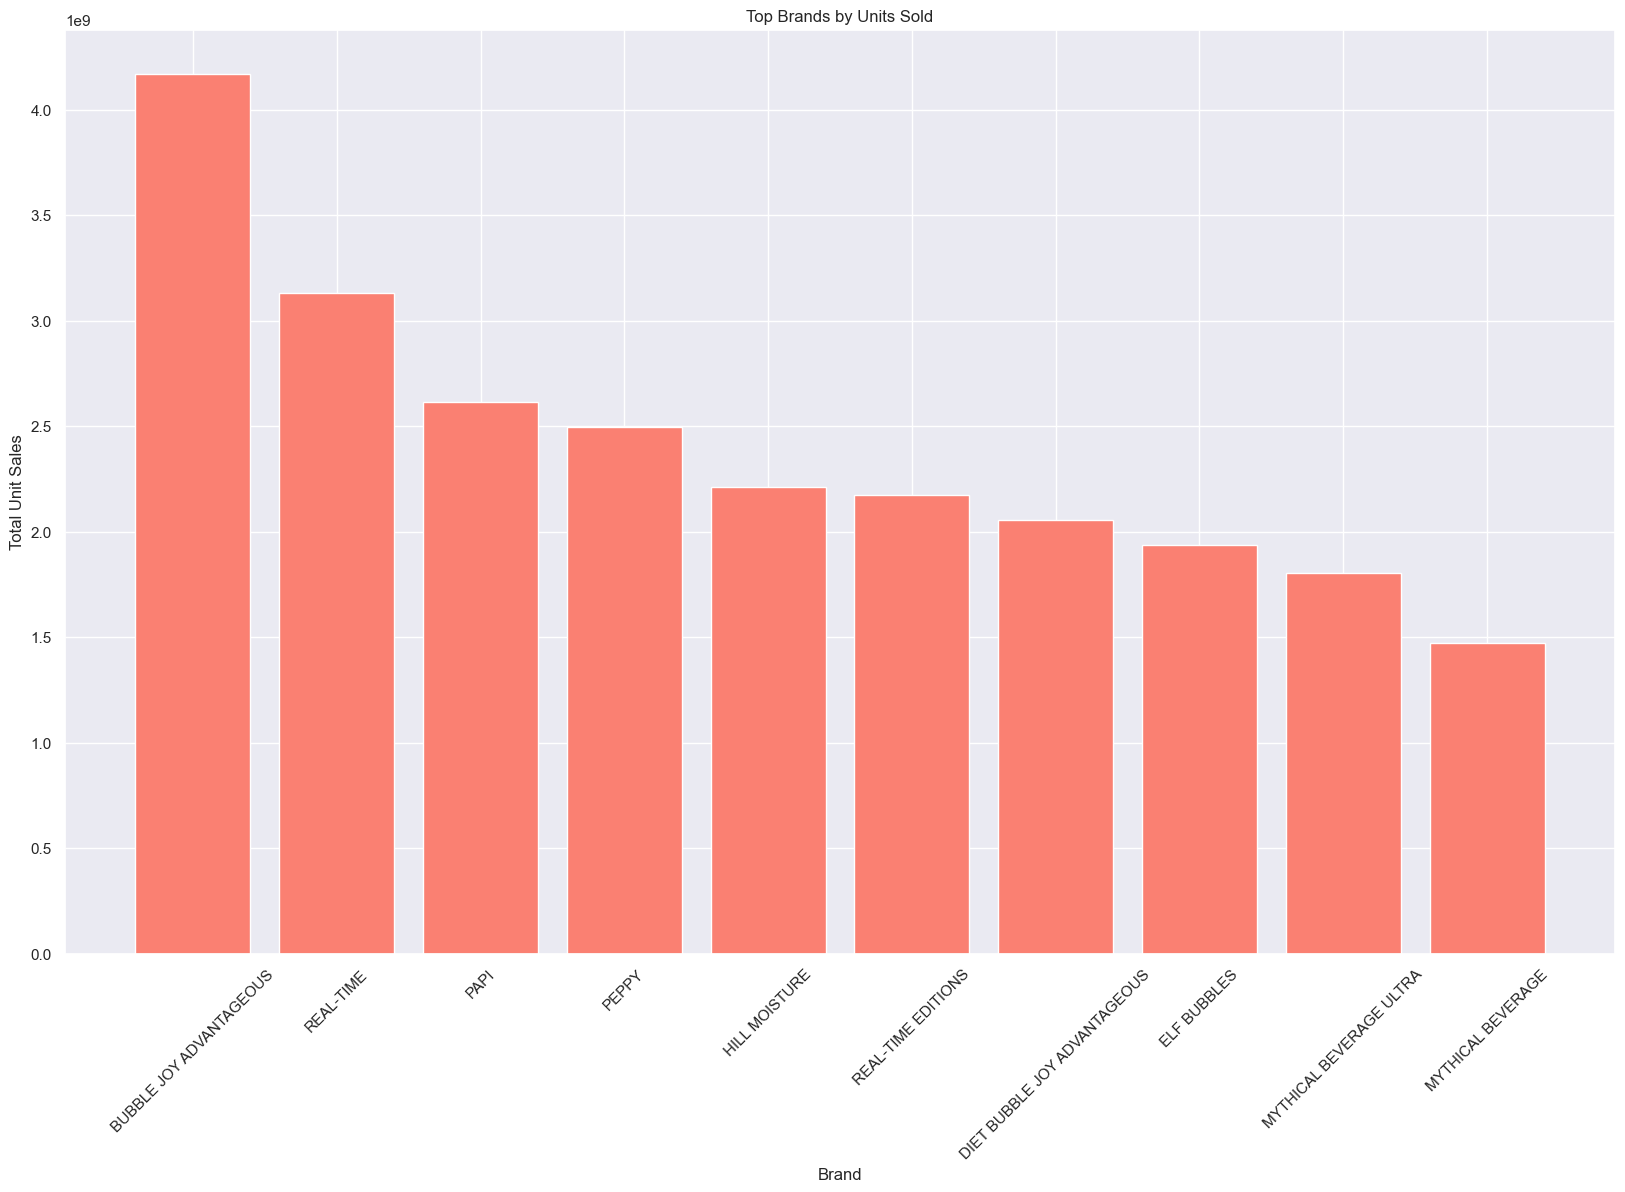

In [38]:
# Plot for top brands as per units sold
plt.figure(figsize=(20,12))
plt.bar(top_brand_sales['BRAND'], top_brand_sales['UNIT_SALES'], color='salmon')
plt.title('Top Brands by Units Sold')
plt.xlabel('Brand')
plt.ylabel('Total Unit Sales')
plt.xticks(rotation=45)
plt.show()

The bar chart depicts the top brands by units sold, with 'BUBBLE JOY ADVANTAGEOUS' leading the pack by a significant margin, indicating it is the most popular brand in terms of unit sales.The brands at the end, such as 'ELF BUBBLES', 'MYTHICAL BEVERAGE ULTRA', and 'MYTHICAL BEVERAGE', have relatively lower sales, suggesting a drop-off in popularity or market demand compared to the leading brand.

### 5.3 Seasonality of Sales<a name = "sales_seasonality"></a>

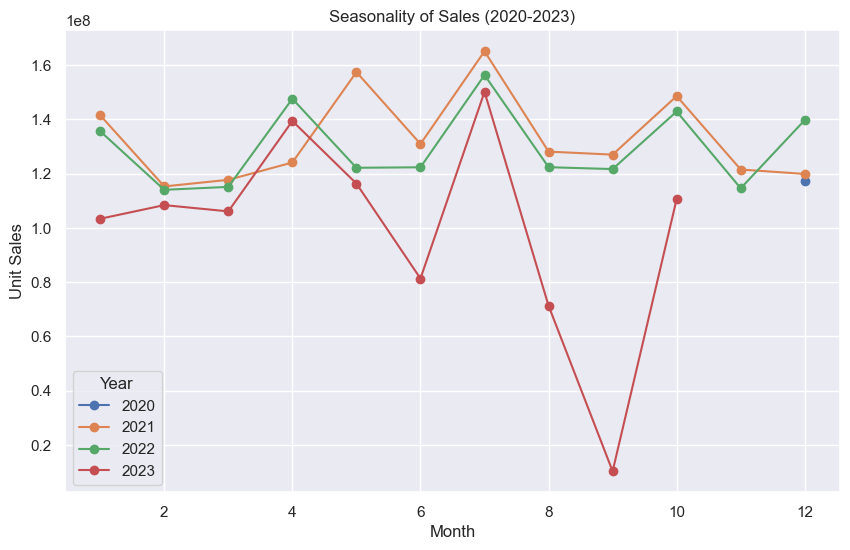

In [39]:
# Group by year and sum up the unit sales
yearly_sales = parquetDF.groupby(['YEAR', 'MONTH'])['UNIT_SALES'].sum().reset_index()

# Pivot the data to have years as columns
pivot_sales = yearly_sales.pivot(index='MONTH', columns='YEAR', values='UNIT_SALES')

# Plotting
plt.figure(figsize=(10,6))
pivot_sales.plot(ax=plt.gca(), marker='o')
plt.title('Seasonality of Sales (2020-2023)')
plt.xlabel('Month')
plt.ylabel('Unit Sales')
plt.legend(title='Year')
plt.grid(True)
plt.show()

The chart shows unit sales across different months spanning from 2020 to 2023, providing insight into seasonal trends. Each line represents a year and its monthly sales pattern. Notably, a sharp decline in unit sales is observed around the middle of 2023, deviating significantly from other years' trends. This anomaly may indicate a data issue or other irregularities during that period. One prominent observation is the noticeable increase in unit sales around the 7th month across multiple years, indicating a recurring seasonal trend. This uptick could be attributed to heightened beverage consumption during warmer summer months or could be linked to specific events or promotions conducted by the company during this period.Overall, sales exhibit fluctuations throughout the year, suggesting typical seasonal variation in consumer buying habits or potential influences from external factors like marketing initiatives, holidays, or economic conditions.

## 6. Correlation <a id='correlation'></a>

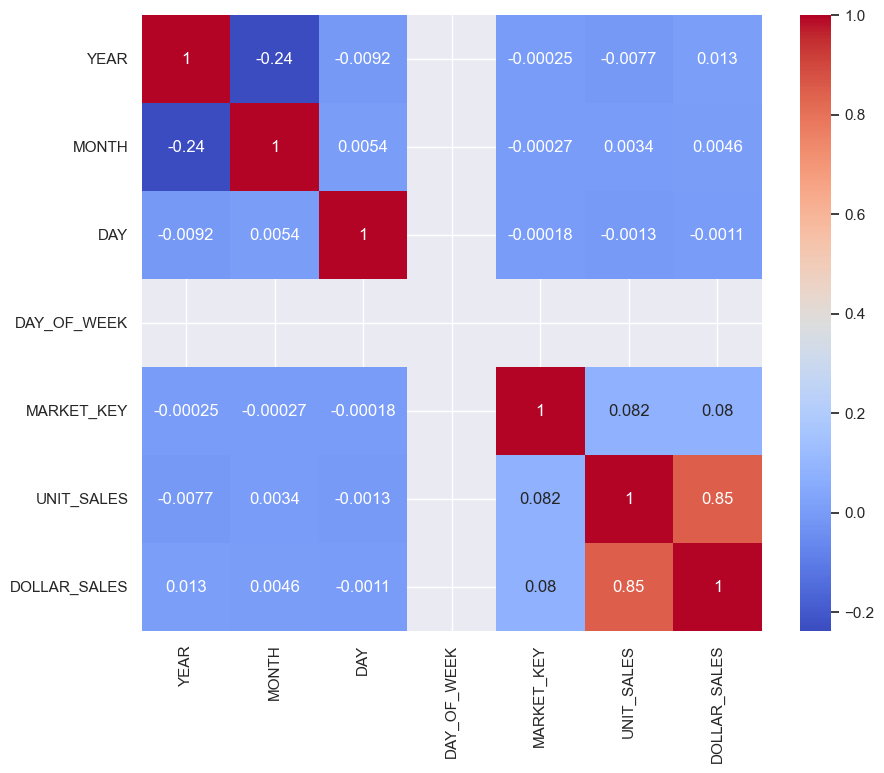

In [40]:
# Calculate the correlation matrix
correlation_matrix = parquetDF[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'MARKET_KEY', 'UNIT_SALES', 'DOLLAR_SALES']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The heatmap illustrates correlation coefficients between different variables, indicating notable observations:

There is a very high positive correlation (0.85) between UNIT_SALES and DOLLAR_SALES, implying that as unit sales increase, dollar sales tend to increase proportionally, which aligns with typical sales patterns.
A moderate negative correlation (-0.24) exists between YEAR and MONTH, suggesting that certain months may exhibit lower sales over the years.
Other variables (YEAR, MONTH, DAY, DAY_OF_WEEK, MARKET_KEY) demonstrate very low to negligible correlations with UNIT_SALES and DOLLAR_SALES, indicating a lack of strong linear relationship between these time variables or market identifier and sales figures.

## 7. Missing Data and Imputation <a id='missing_data'></a>

In [27]:
print(demoDF.isnull().sum())

Geography Name    0
Zip               0
City              0
State             0
Segment           0
Criteria          0
Count             0
Criteria_Unit     0
dtype: int64


There are no missing data in Consumer Demographics dataset.

In [28]:
print(zipmap.isnull().sum())

ZIP_CODE      0
MARKET_KEY    0
dtype: int64


There are no missing data in ZipCode to MarketKey dataset.

In [29]:
print(parquetDF.isnull().sum())

DATE                   0
MARKET_KEY             0
CALORIC_SEGMENT    59725
CATEGORY               0
UNIT_SALES             0
DOLLAR_SALES           0
MANUFACTURER           0
BRAND                  0
PACKAGE                0
ITEM                   0
YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
dtype: int64


Out of all Columns in ParquetDF, only one column - Caloric Segment has around 59725 Null values.

In [30]:
# calculating percentage of null rows
null_percentage = (parquetDF['CALORIC_SEGMENT'].isnull().sum() / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(null_percentage)

print('The percentage of rows with null CALORIC_SEGMENT:', formatted_percentage)

The percentage of rows with null CALORIC_SEGMENT: 0.24%


In [31]:
# looking at the head of the null caloric_segment columns
parquetDF[parquetDF['CALORIC_SEGMENT'].isnull()].head()

,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM,YEAR,MONTH,DAY,DAY_OF_WEEK
603,2022-04-09,197,None,SSD,82.00,256.09,JOLLYS,PAPI WILD CHERRY,7.5SMALL MLT CUP,PAPI GENTLE DRINK WILD RED COLA CUP 7.5 LIQUI...,2022,4,9,5
1529,2020-12-05,413,None,SSD,93.00,184.78,JOLLYS,PAPI REAL SUGAR THROWBACK,20SMALL MULTI JUG,PAPI-COLA GENTLE DRINK COLA JUG 20 LIQUID SMALL,2020,12,5,5
1587,2022-08-27,87,None,SSD,54.00,112.16,JOLLYS,PAPI REAL SUGAR THROWBACK,20SMALL MULTI JUG,PAPI-COLA GENTLE DRINK COLA JUG 20 LIQUID SMALL,2022,8,27,5
1601,2022-05-21,969,None,SSD,40.00,133.92,JOLLYS,PAPI WILD CHERRY,7.5SMALL MLT CUP,PAPI GENTLE DRINK WILD RED COLA CUP 7.5 LIQUI...,2022,5,21,5
1856,2021-01-02,530,None,SSD,7.00,14.71,JOLLYS,PAPI REAL SUGAR THROWBACK,20SMALL MULTI JUG,PAPI-COLA GENTLE DRINK COLA JUG 20 LIQUID SMALL,2021,1,2,5


In [32]:
# check to see the manaufacturer on the nulls

# filter the DataFrame for rows where 'CALORIC_SEGMENT' is null
nulls = parquetDF[parquetDF['CALORIC_SEGMENT'].isnull()]

# group by 'MANUFACTURER' and count the number of nulls
nulls_by_manufacturer = nulls['MANUFACTURER'].value_counts()

print(nulls_by_manufacturer)

MANUFACTURER
JOLLYS      59335
COCOS         379
ALLYS           8
SWIRE-CC        3
Name: count, dtype: int64


The result indicates that within the dataset, there are a significant number of records with missing CALORIC_SEGMENT values, primarily from the manufacturer 'JOLLYS' with 59,335 missing entries, followed by 'COCOS' with 379, 'ALLYS' with 8, and 'SWIRE-CC' with 3. This suggests that the missing data issue is particularly pronounced for products manufactured by 'JOLLYS', hinting at either a systematic data entry omission or a lack of available information for these products' caloric segments. Addressing these missing values will be crucial for any analysis involving the CALORIC_SEGMENT variable, especially if the analysis aims to understand product distribution by caloric content across different manufacturers.

However, given that the missing values only constitute around 0.24% of the total dataset, they are relatively insignificant. Consequently, these missing values will be handled, either by omission or imputation, during the modeling phase.


## 8. Outliers analysis <a id='outliers'></a>

In [33]:
# checking for obvious outliers
from scipy import stats

# selecting 'MARKET_SALES' and 'UNIT_SALES' columns
selected_columns = parquetDF[['DOLLAR_SALES', 'UNIT_SALES']]

# calculating z-scores
z_scores = stats.zscore(selected_columns)

# converting z-scores to DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=selected_columns.columns)

# calculating count of rows with z-score > 3 for each column
outlier_counts = (z_scores_df > 3).sum()

print('The count of rows with Z-score > 3 for each selected column:')
print(outlier_counts)

The count of rows with Z-score > 3 for each selected column:
DOLLAR_SALES    144906
UNIT_SALES      160380
dtype: int64


The result shows a significant number of outliers in both DOLLAR_SALES and UNIT_SALES columns, with 144,906 and 160,380 outliers respectively, based on a Z-score threshold of >3. This indicates extreme values in sales data that deviate significantly from the mean, suggesting potential issues like data entry errors, unusual sales events, or other anomalies.It's essential to meticulously examine and potentially adjust or remove these outliers to guarantee the accuracy of our analysis and modeling.

In [34]:
# selecting only numeric columns
numeric_columns = parquetDF.select_dtypes(include=[np.number])

# calculating z-scores
z_scores = stats.zscore(numeric_columns)

# converting z-scores to DataFrame
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns.columns)

# creating a boolean DataFrame where True indicates that the z-score > 3
outlier_mask = (z_scores_df > 3)

# finding rows that contain more than one outlier
outlier_rows = parquetDF[outlier_mask.sum(axis=1) > 1]

print('Rows that contain more than one outlier:')
display(outlier_rows)

Rows that contain more than one outlier:


,DATE,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,UNIT_SALES,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM,YEAR,MONTH,DAY,DAY_OF_WEEK
26,2020-12-19,952,REGULAR,ENERGY,9515.00,19836.89,PONYS,MYTHICAL BEVERAGE,16SMALL MULTI CUP,MYTHICAL BEVERAGE ENERGY DRINK UNFLAVORED CUP ...,2020,12,19,5
62,2022-02-19,926,REGULAR,SSD,3099.00,14461.00,JOLLYS,PAPI,12SMALL 12ONE CUP,PAPI GENTLE DRINK COLA CUP 12 LIQUID SMALL X12,2022,2,19,5
257,2021-11-06,980,REGULAR,SSD,6601.00,13747.73,COCOS,BUBBLE JOY ADVANTAGEOUS,20SMALL MULTI JUG,KOOL! GENTLE DRINK COLA JUG 20 LIQUID SMALL,2021,11,6,5
324,2021-11-06,1811,REGULAR,SSD,3269.00,9930.01,JOLLYS,PAPI,7.5SMALL 6ONE CUP,PAPI GENTLE DRINK COLA CUP 7.5 LIQUID SMALL X6,2021,11,6,5
484,2022-05-21,442,DIET/LIGHT,ENERGY,4837.00,11379.86,JORDYS,POW-POW,16SMALL MULTI CUP,POW-POW DIETARY HEALTH SUPPLEMENT LIQUID POTEN...,2022,5,21,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24459153,2022-11-26,953,REGULAR,SSD,7272.00,30927.74,COCOS,BUBBLE JOY ADVANTAGEOUS,12SMALL 12ONE CUP,KOOL! GENTLE DRINK COLA CUP 12 LIQUID SMALL X12,2022,11,26,5
24460102,2021-12-11,6802,DIET/LIGHT,SSD,4174.00,8436.87,JOLLYS,DIET PAPI,20SMALL MULTI JUG,DIET PAPI GENTLE DRINK COLA DIET JUG 20 LIQUID...,2021,12,11,5
24461025,2022-05-07,977,REGULAR,ENERGY,7008.00,19956.53,ALLYS,REAL-TIME,12SMALL MULTI CUP,REAL-TIME ENERGY DRINK UNFLAVORED CUP 12 LIQUI...,2022,5,7,5
24461148,2022-09-10,441,REGULAR,ENERGY,5602.00,15987.67,ALLYS,REAL-TIME,12SMALL MULTI CUP,REAL-TIME ENERGY DRINK UNFLAVORED CUP 12 LIQUI...,2022,9,10,5


In [35]:
# calculating percentage of outlier rows
outlier_percentage = (len(outlier_rows) / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(outlier_percentage)

print('The percentage of rows with outliers in both UNIT_SALES and DOLLAR_SALES:', formatted_percentage)

The percentage of rows with outliers in both UNIT_SALES and DOLLAR_SALES: 0.41%


In [36]:
# finding rows that contain outliers in either 'UNIT_SALES' or 'DOLLAR_SALES', but not both
outlier_rows = parquetDF[outlier_mask.sum(axis=1) == 1]

# calculating percentage of outlier rows
outlier_percentage = (len(outlier_rows) / len(parquetDF)) * 100

# formatting the result to 2 decimal points
formatted_percentage = "{:.2f}%".format(outlier_percentage)

print('The percentage of rows with outliers in either UNIT_SALES or DOLLAR_SALES, but not both:', formatted_percentage)

The percentage of rows with outliers in either UNIT_SALES or DOLLAR_SALES, but not both: 1.07%


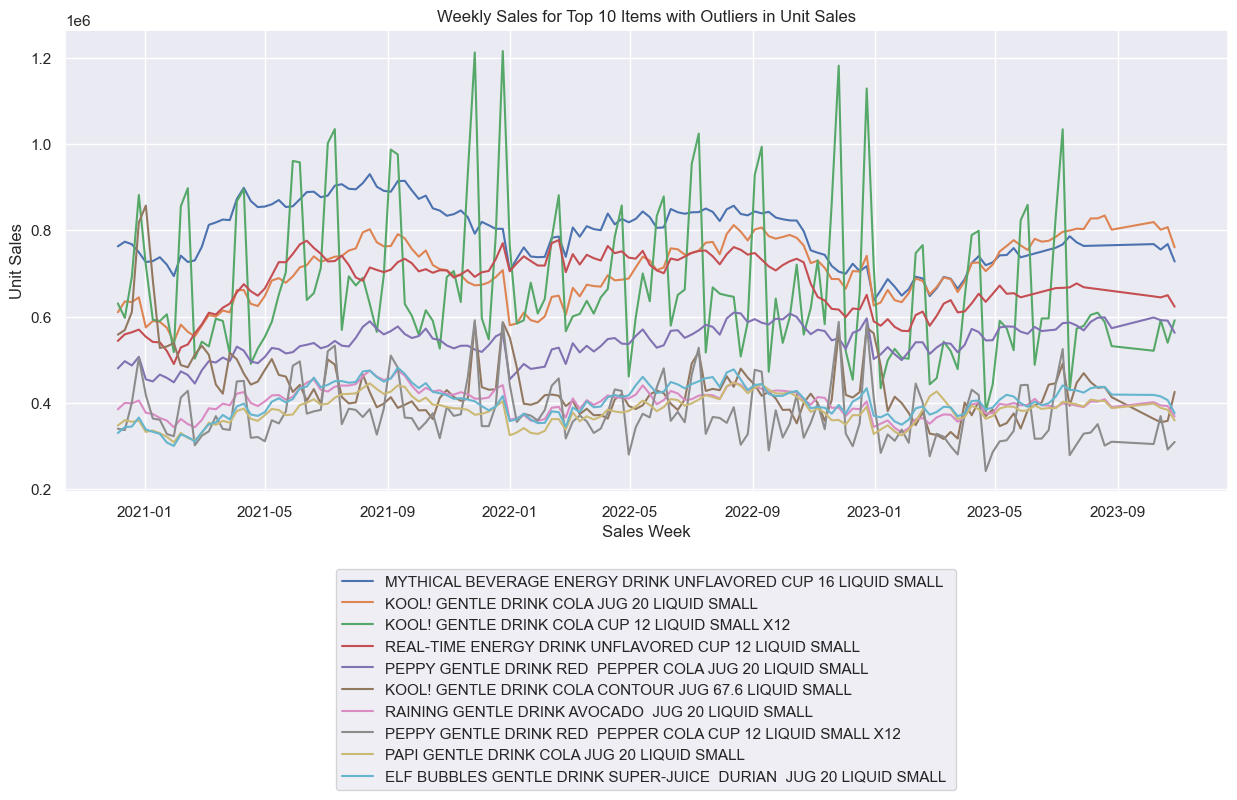

In [37]:
# re-calculate z-scores for 'UNIT_SALES'
parquetDF['z_scores'] = stats.zscore(parquetDF['UNIT_SALES'])

# filter the DataFrame to include only rows with outliers in 'UNIT_SALES'
outliers_df = parquetDF[parquetDF['z_scores'].abs() > 3]

# group by 'ITEM' and sum 'UNIT_SALES' for outliers
outlier_item_sales = outliers_df.groupby('ITEM')['UNIT_SALES'].sum()

# find the top 10 items by sales among outliers
top_10_outlier_items = outlier_item_sales.nlargest(10)

# filter the original DataFrame to include only the top 10 items with outliers
top_10_items_data = parquetDF[parquetDF['ITEM'].isin(top_10_outlier_items.index)]

# group by 'DATE' and 'ITEM', and sum 'UNIT_SALES' for the top 10 items
weekly_sales = top_10_items_data.groupby(['DATE', 'ITEM'])['UNIT_SALES'].sum().reset_index()

# plot the weekly sales for each of the top 10 items
for item in top_10_outlier_items.index:
    item_data = weekly_sales[weekly_sales['ITEM'] == item]
    plt.plot(item_data['DATE'], item_data['UNIT_SALES'], label=item)

plt.xlabel('Sales Week')
plt.ylabel('Unit Sales')
plt.title('Weekly Sales for Top 10 Items with Outliers in Unit Sales')
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
plt.grid(True)
plt.show()

The graph depicts the weekly unit sales data for the top 10 items flagged as outliers in the UNIT_SALES column. Each line represents one of these top items. The peaks in the graph indicate occasional spikes in sales, which are significant enough to qualify as outliers with a Z-score surpassing 3. Such spikes could arise from special events, promotions, or seasonal demand, leading to temporary boosts in sales. The time-series trend exhibits fluctuations across weeks, with some items consistently showing outlier sales over multiple periods, while others display sporadic peaks. Conducting this type of analysis is pivotal for comprehending the sales patterns of high-performing items and can inform decisions related to inventory management and marketing strategies.


## 9. Modeling <a id='Modeling'></a>

Modeling in machine learning is the process of constructing mathematical representations or computational structures based on available data and domain knowledge. These models enable the extraction of meaningful insights, prediction of future outcomes, and automation of decision-making processes. By analyzing patterns and relationships within data, machine learning models can uncover hidden insights that aid in various applications, including fraud detection, recommendation systems, autonomous vehicles, and personalized medicine. The iterative process of building, training, and refining models allows for continuous improvement and adaptation to evolving datasets and problem domains, making modeling a crucial component of the machine learning pipeline.
    

Let's remove z-scores which is added to check the outliers. Columns like caloric Segment, Category, Manufacturer, brand , package , item are changed to categorical data type to deploy the models.

In [38]:
# remove z_scores
parquetDF = parquetDF.drop('z_scores', axis=1)

# Downcast numeric columns
parquetDF['MARKET_KEY'] = parquetDF['MARKET_KEY'].astype('int32')
parquetDF[['UNIT_SALES', 'DOLLAR_SALES']] = parquetDF[['UNIT_SALES', 'DOLLAR_SALES']].astype('float32')

# Convert object columns to category
for col in ['CALORIC_SEGMENT', 'CATEGORY', 'MANUFACTURER', 'BRAND', 'PACKAGE', 'ITEM']:
    parquetDF[col] = parquetDF[col].astype('category')
    

parquetDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24461424 entries, 0 to 24461423
Data columns (total 14 columns):
 #   Column           Dtype         
---  ------           -----         
 0   DATE             datetime64[ns]
 1   MARKET_KEY       int32         
 2   CALORIC_SEGMENT  category      
 3   CATEGORY         category      
 4   UNIT_SALES       float32       
 5   DOLLAR_SALES     float32       
 6   MANUFACTURER     category      
 7   BRAND            category      
 8   PACKAGE          category      
 9   ITEM             category      
 10  YEAR             int32         
 11  MONTH            int32         
 12  DAY              int32         
 13  DAY_OF_WEEK      int32         
dtypes: category(6), datetime64[ns](1), float32(2), int32(5)
memory usage: 1.0 GB



## 9.1. Random Forest <a id='Random_Forest'></a>

Random Forest is a popular ensemble learning algorithm in machine learning that operates by constructing multiple decision trees during training and outputs the mode (classification) or mean prediction (regression) of the individual trees. It's known for its robustness against overfitting and ability to handle large datasets with high dimensionality. Random Forest introduces randomness both in the data used to train each tree and in the features considered at each split, resulting in diverse and uncorrelated trees that collectively produce more accurate and stable predictions.

In this code snippet, we're enhancing our DataFrame, 'parquetDF,' by incorporating additional features derived from the 'DATE' column. By extracting the year, month, day, and day of the week from the date values, we're creating new columns 'YEAR,' 'MONTH,' 'DAY,' and 'DAY_OF_WEEK' respectively. This augmentation enriches our dataset with temporal information, which can be valuable for subsequent analysis or modeling tasks, such as with a Random Forest algorithm.


We're preparing our DataFrame, 'parquetDF,' for modeling by first dropping any non-numeric columns, such as datetime columns, which are not relevant for modeling purposes. We achieve this by selecting only columns with numeric data types. Subsequently, we convert categorical columns into numeric representations using one-hot encoding, creating binary indicator variables for each category. This transformation helps to ensure that our data is in a suitable format for analysis, particularly when employing machine learning algorithms like Random Forests.

In [131]:
# Create new features from 'DATE'
# parquetDF['YEAR'] = parquetDF['DATE'].dt.year
# parquetDF['MONTH'] = parquetDF['DATE'].dt.month
# parquetDF['DAY'] = parquetDF['DATE'].dt.day
# parquetDF['DAY_OF_WEEK'] = parquetDF['DATE'].dt.dayofweek

# # Drop any non-numeric columns (like datetime columns) not relevant to modeling
# parquetDF = parquetDF.select_dtypes(include=[np.number])
# # Convert categorical columns to numeric through one-hot encoding
# parquetDF = pd.get_dummies(parquetDF, drop_first=True)

In this code chunk, we're generating a random sample, 'sampleDF,' from the preprocessed DataFrame, 'parquetDF,' comprising 240,000 records. Following this, we split the data into features (X) and target variable (y), where 'UNIT_SALES' is the target variable to predict. Then, we split the dataset into training and testing sets (X_train_s, X_test_s, y_train_s, y_test_s) using a 80-20 split ratio, facilitating model training and evaluation, with a specified random seed (random_state=42) for reproducibility. This prepares the data for further processing and modeling tasks, including the application of machine learning algorithms like Random Forest.

In [132]:
# Create random sample of the dataframe after preprocessing
sampleDF = parquetDF.sample(240000)

# Proceed to split the data
X = sampleDF.drop('UNIT_SALES', axis=1)
y = sampleDF['UNIT_SALES']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42)

In this code section, we're utilizing scikit-learn to perform hyperparameter tuning for a Random Forest regression model. We first import necessary modules such as RandomForestRegressor for building the model, mean_squared_error, mean_absolute_error, and r2_score for evaluation metrics, RandomizedSearchCV for hyperparameter tuning, train_test_split for data splitting, and numpy for numerical computations. 

We initialize the Random Forest model (rf_model_s) with a specified random seed. Then, we define a dictionary (param_dist_sampled_rf) containing hyperparameters and their potential values. Subsequently, we create a RandomizedSearchCV object (rf_random_search) with the defined hyperparameter distributions, specifying the number of iterations, cross-validation folds, verbosity, and parallel processing.

Next, we fit the RandomizedSearchCV object to the training data (X_train_s, y_train_s), allowing it to explore different hyperparameter combinations and select the optimal ones based on cross-validation performance. After fitting, we retrieve the best parameters selected by the RandomizedSearchCV using the 'best_params_' attribute and print them out for inspection. This process aids in identifying the most suitable hyperparameters for the Random Forest model, enhancing its predictive performance.


In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np

# Initialize the Random Forest model
rf_model_s = RandomForestRegressor(random_state=42)

# Define the hyperparameters and their distributions
param_dist_sampled_rf = {
    'n_estimators': [ 200, 300, 400],
    'max_depth': [None,2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,3],
    'bootstrap': [True, False]
}

# Initialize the RandomizedSearchCV object
rf_random_search = RandomizedSearchCV(estimator=rf_model_s, param_distributions=param_dist_sampled_rf,
                                      n_iter=8, cv=4, verbose=0, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the data
rf_random_search.fit(X_train_s, y_train_s)

# Get the best parameters
best_params_rf = rf_random_search.best_params_
print("Best parameters:", best_params_rf)


Best parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


In this code snippet, we're splitting the preprocessed DataFrame 'parquetDF' into features (X) and the target variable (y), with 'UNIT_SALES' as the target variable to predict. We utilize the train_test_split function from scikit-learn to partition the data into training and testing sets, with a test size of 20% and a specified random seed (random_state=42) to ensure reproducibility. This split enables us to train our machine learning models on the training data (X_train, y_train) and evaluate their performance on the unseen test data (X_test, y_test), facilitating model validation and assessment of generalization capabilities.

In [135]:
X = parquetDF.drop('UNIT_SALES', axis=1)
y = parquetDF['UNIT_SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In this code segment, we're rerunning the Random Forest regression model with the best hyperparameters obtained from the RandomizedSearchCV process. We initialize a new RandomForestRegressor instance (rf_best_model) with the best parameters (**best_params_rf) and a specified random seed. We then train this model on the training data (X_train, y_train) using the fit method.

After training, we make predictions (rf_preds) on the test data (X_test) using the predict method. Subsequently, we evaluate the performance of the model by calculating the root mean squared error (rf_rmse), mean absolute error (rf_mae), and R-squared (rf_r2) using the actual test labels (y_test) and the predicted values (rf_preds). These evaluation metrics provide insights into the model's accuracy, precision, and goodness of fit, aiding in assessing its predictive performance.

In [138]:
# # Rerunning with best params from RandomizedSearchCV
# rf_best_model = RandomForestRegressor(**best_params_rf, random_state=42)
# rf_best_model.fit(X_train, y_train)

# # Predictions
# rf_preds = rf_best_model.predict(X_test)

# # Evaluate the model
# rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
# rf_mae = mean_absolute_error(y_test, rf_preds)
# rf_r2 = r2_score(y_test, rf_preds)
# print("Random Forest RMSE:", rf_rmse)
# print("Random Forest MAE:", rf_mae)
# print("Random Forest R-squared:", rf_r2)

# # Check for overfitting by comparing train and test errors
# train_rf_preds = rf_best_model.predict(X_train)
# rf_train_mae = mean_absolute_error(y_train, train_rf_preds)

# print("Random Forest Training MAE:", rf_train_mae)
# print("Random Forest Test MAE:", rf_mae)

RMSE: 102.65, MAE: 88.34, R-Squared: 0.77
Since Random forest code is taking longer time(few hours to run), the code for this model has been commented out in the file.

## 9.2. XG Boost <a id='xgboost'></a>

XGBoost (eXtreme Gradient Boosting) is a gradient boosting algorithm known for its efficiency and effectiveness in regression and classification tasks. It incorporates advanced techniques like regularization, tree pruning, and cross-validation, making it robust against overfitting and capable of handling large datasets. Its parallel processing capabilities enable scalability, while built-in features for handling missing values simplify preprocessing. Widely used in competitions and industries, XGBoost's superior performance and ease of use make it a popular choice for various machine learning applications.

In [39]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np

In [40]:
# Assuming 'DATE' is the name of your datetime column in X_train
parquetDF['YEAR'] = parquetDF['DATE'].dt.year
parquetDF['MONTH'] = parquetDF['DATE'].dt.month
parquetDF['DAY'] = parquetDF['DATE'].dt.day

# Now you can drop the original 'DATE' column
parquetDF = parquetDF.drop(columns=['DATE'])

In [41]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store the LabelEncoders
label_encoders = {}

# Apply label encoding to each categorical column
categorical_features = ['CALORIC_SEGMENT', 'CATEGORY', 'MANUFACTURER', 'BRAND', 'PACKAGE', 'ITEM']
for feature in categorical_features:
    le = LabelEncoder()  # Initialize the LabelEncoder
    parquetDF[feature] = le.fit_transform(parquetDF[feature])
    label_encoders[feature] = le  # Store the LabelEncoder for later use

# split the data
X = parquetDF.drop('UNIT_SALES', axis=1)
y = parquetDF['UNIT_SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
X_test.head()

,MARKET_KEY,CALORIC_SEGMENT,CATEGORY,DOLLAR_SALES,MANUFACTURER,BRAND,PACKAGE,ITEM,YEAR,MONTH,DAY,DAY_OF_WEEK
17205790,303,1,4,11.98,7,275,10,3124,2021,12,25,5
22717123,978,0,2,16.52,3,95,3,919,2022,3,12,5
24131524,882,1,4,162.97,2,270,78,2974,2023,2,11,5
19864775,980,0,2,106.92,7,136,57,1399,2021,10,9,5
2896334,913,0,2,46.98,3,95,70,884,2021,10,2,5


In [43]:
model = xgb.XGBRegressor(objective ='reg:squarederror', 
                         colsample_bytree = 0.3, 
                         learning_rate = 0.1,
                         max_depth = 5, 
                         alpha = 10, 
                         n_estimators = 10)

model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

An XGBoost regression model is instantiated and trained on the training data (X_train, y_train). The model is configured with specific hyperparameters, including the objective function 'reg:squarederror' for regression, a column subsampling ratio of 0.3, a learning rate of 0.1, maximum tree depth of 5, L1 regularization parameter alpha set to 10, and 10 estimators (trees) in the ensemble. The fit method is then called to train the model on the provided training data.

In [44]:
from sklearn.metrics import mean_squared_error

# predictions
preds = model.predict(X_test)

# Now you can use mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 736.966797


In this code snippet, predictions are generated using the trained XGBoost regression model (stored in 'model') on the test data (X_test). Finally, the root mean squared error (RMSE) is computed by taking the square root of the MSE, providing a measure of the model's prediction error. The calculated RMSE value is printed out as 736.96. 

A high RMSE (Root Mean Squared Error) of 736.96 indicates that, on average, the predictions made by the XGBoost regression model differ from the actual values by approximately 737 units. This magnitude of error suggests that the model's performance is not optimal, and there is substantial discrepancy between its predictions and the true values.

In [45]:
min_value = parquetDF['UNIT_SALES'].min()
max_value = parquetDF['UNIT_SALES'].max()

print("Minimum value of UNIT_SALES: ", min_value)
print("Maximum value of UNIT_SALES: ", max_value)

Minimum value of UNIT_SALES:  0.03999999910593033
Maximum value of UNIT_SALES:  96776.0


In [47]:
from sklearn.metrics import mean_absolute_error

# look at mean_absolute_error
mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

MAE: 143.330765


The Mean Absolute Error (MAE) value of 143.33 indicates that, on average, the absolute difference between the predicted values and the actual values is approximately 143 units. Compared to the RMSE, which considers squared errors, the MAE provides a measure of the average magnitude of errors without considering their direction. A lower MAE suggests better model performance, indicating that the model's predictions are closer to the actual values. In this case, the MAE value being substantially lower than the RMSE indicates that the errors are relatively consistent in magnitude, but the model may still benefit from further improvement to reduce prediction errors.

### Hyperparameter Tuning With Sample of Data

Hyperparameter tuning involves optimizing the settings that control the learning process of a machine learning algorithm. These parameters are not learned from the data but are set prior to training. Tuning is essential as it can significantly impact a model's performance, helping to find the best configuration for improved accuracy, generalization, and efficiency. Through techniques like grid search or random search, hyperparameter tuning explores different combinations to identify the optimal settings that minimize error or maximize performance metrics. It ensures that the model is not overfitting or underfitting and enhances its ability to capture complex patterns in the data, ultimately leading to better predictive performance in real-world scenarios.

In [48]:
# create random sample of the dataframe
sampleDF = parquetDF.sample(240000)

# split the sample data
X = sampleDF.drop('UNIT_SALES', axis=1)
y = sampleDF['UNIT_SALES']

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model_s = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

model_s.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

In this code snippet, a regression model using XGBoost is instantiated and trained. The model is configured with specific hyperparameters, including the objective function 'reg:squarederror', a column subsampling ratio of 0.3, learning rate of 0.1, maximum tree depth of 5, L1 regularization strength alpha of 10, and 10 estimators in the ensemble. The fit method is then applied to train the model on the provided training data (X_train, y_train), enabling it to learn patterns and relationships within the data to make predictions.

In [50]:
# prediction
preds_s = model_s.predict(X_test_s)

# Now you can use mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_s, preds_s))
print("RMSE: %f" % (rmse))

RMSE: 681.159973


The Root Mean Squared Error (RMSE) value of 681.15 indicates the average deviation between the predicted values generated by the XGBoost regression model and the actual values in the test dataset. In this case, the RMSE value being lower than the previous one (736.966797) suggests an improvement in the model's performance after training with the specified hyperparameters.

In [51]:
# look at mean_absolute_error
mae = mean_absolute_error(y_test_s, preds_s)
print("MAE: %f" % (mae))

MAE: 141.895859


The Mean Absolute Error (MAE) value of 141.89 represents the average absolute difference between the predicted values and the actual values in the test dataset. A lower MAE indicates that, on average, the model's predictions are closer to the true values. Compared to the previous MAE value (143.330765), this lower MAE suggests an improvement in the model's accuracy, indicating that it is better at capturing the underlying patterns in the data and making more precise predictions.

In [52]:
from skopt import BayesSearchCV

# Define the hyperparameters and their distributions
param_dist_s = {
    'n_estimators': (100, 400),
    'max_depth': (3, 6),
    'learning_rate': (0.01, 0.2),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.4, 1.0),
    'gamma': (0, 1.0)
}

# Initialize the BayesSearchCV object
bayes_search = BayesSearchCV(model_s, param_dist_s, n_iter=50, cv=5, random_state=42)

# Fit the BayesSearchCV object to the data
bayes_search.fit(X_train_s, y_train_s)

# Get the best parameters
best_params_s = bayes_search.best_params_

# Print the best parameters
print("Best parameters: ", best_params_s)

Best parameters:  OrderedDict([('colsample_bytree', 0.9192180111235491), ('gamma', 1.0), ('learning_rate', 0.2), ('max_depth', 5), ('n_estimators', 400), ('subsample', 1.0)])


This code snippet employs Bayesian optimization for hyperparameter tuning using BayesSearchCV from scikit-optimize. It initializes a search space for hyperparameters and conducts a search over this space to find optimal settings for the XGBoost model 'model_s'. After fitting to training data, the best hyperparameters are obtained and printed. The output reveals the optimal parameter configuration that maximizes model performance.

In [53]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their distributions
param_dist_s2 = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.25, 0.5, 1.0]
}

# Initialize the model
model_s2 = xgb.XGBRegressor()

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(model_s2, param_distributions=param_dist_s2, n_iter=50, cv=5, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train_s, y_train_s)

# Get the best parameters
best_params_s2 = random_search.best_params_

# Print the best parameters
print("Best parameters: ", best_params_s2)

Best parameters:  {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 1.0, 'colsample_bytree': 0.9}


This code segment demonstrates the use of RandomizedSearchCV from scikit-learn to perform hyperparameter tuning for an XGBoost regression model. Hyperparameters and their respective search spaces are defined in the 'param_dist_s2' dictionary. A base XGBoost regressor model 'model_s2' is initialized, and a RandomizedSearchCV object 'random_search' is created with the specified hyperparameter distributions, number of iterations (n_iter) set to 50, and 5-fold cross-validation. The object is then fitted to the training data ('X_train_s', 'y_train_s'). After fitting, the best parameters are obtained and printed, indicating the optimal configuration found through random search.

### XGBoost with Best Parameters from BayesSearchCV

In [54]:
import time

start_time = time.time()

# Rerunning with best params from BayesSearchCV
model_bm = xgb.XGBRegressor(objective ='reg:squarederror', **best_params_s)

model_bm.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

# predictions
preds_bm = model_bm.predict(X_test)

# look at mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds_bm))
print("RMSE: %f" % (rmse))

# look at mean_absolute_error
mae = mean_absolute_error(y_test, preds_bm)
print("MAE: %f" % (mae))

Execution time: 92.50399708747864 seconds
RMSE: 158.557907
MAE: 21.792374


The Root Mean Squared Error (RMSE) value of 158.55 and Mean Absolute Error (MAE) value of 21.79 are obtained using the XGBoost regression model with the best hyperparameters discovered through Bayesian optimization with BayesSearchCV. These metrics represent the average deviation and absolute difference, respectively, between the predicted values and the actual values in the test dataset. Lower values indicate better performance, suggesting that the model with optimized hyperparameters significantly improves predictive accuracy compared to the initial model configuration.

### XGBoost with Best Parameters from RandomizedSearchCV

In [55]:
import time

start_time = time.time()

# best_params_s2 from previous sample iteration
best_params_s2 = {
    'subsample': 0.9, 
    'n_estimators': 400, 
    'max_depth': 5, 
    'learning_rate': 0.2, 
    'gamma': 0.5, 
    'colsample_bytree': 0.8
}

# Rerunning with best params from BayesSearchCV
model_rm = xgb.XGBRegressor(objective ='reg:squarederror', **best_params_s2)

model_rm.fit(X_train, y_train)

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

# predictions
preds_rm = model_rm.predict(X_test)

# Now you can use mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds_rm))
print("RMSE: %f" % (rmse))


# look at mean_absolute_error
mae = mean_absolute_error(y_test, preds_rm)
print("MAE: %f" % (mae))

from sklearn.metrics import r2_score, accuracy_score

# calculate R-squared
r2 = r2_score(y_test, preds_rm)
print("R-squared: %f" % (r2))

Execution time: 94.54037714004517 seconds
RMSE: 169.292664
MAE: 24.027527
R-squared: 0.962944


The XGBoost regression model with the best hyperparameters obtained from RandomizedSearchCV achieves an RMSE of 169.29, an MAE of 24.02, and an R-squared value of 0.96 on the test dataset. These metrics indicate that the model's predictions are highly accurate, with the RMSE and MAE representing the average deviation and absolute difference, respectively, between predicted and actual values, and the R-squared value indicating the proportion of variance in the target variable that is explained by the model. These results suggest that the model with optimized hyperparameters performs exceptionally well in capturing the underlying patterns in the data and making precise predictions.

### Feature Importance

Feature importance refers to the technique used in machine learning to determine the relative significance of input variables (features) in predicting the target variable. It helps understand which features have the most influence on the model's predictions. Various algorithms offer methods to calculate feature importance, such as decision trees, random forests, and gradient boosting machines. These techniques assess how much each feature contributes to reducing impurity or error in the model's predictions. Feature importance scores can aid in model interpretation, feature selection, and identifying key factors driving predictions, providing valuable insights for decision-making and problem understanding in various applications.

            Feature  Importance
3      DOLLAR_SALES        0.34
0        MARKET_KEY        0.14
6           PACKAGE        0.11
5             BRAND        0.10
1   CALORIC_SEGMENT        0.09
7              ITEM        0.07
4      MANUFACTURER        0.07
2          CATEGORY        0.05
8              YEAR        0.01
10              DAY        0.01
9             MONTH        0.00
11      DAY_OF_WEEK        0.00


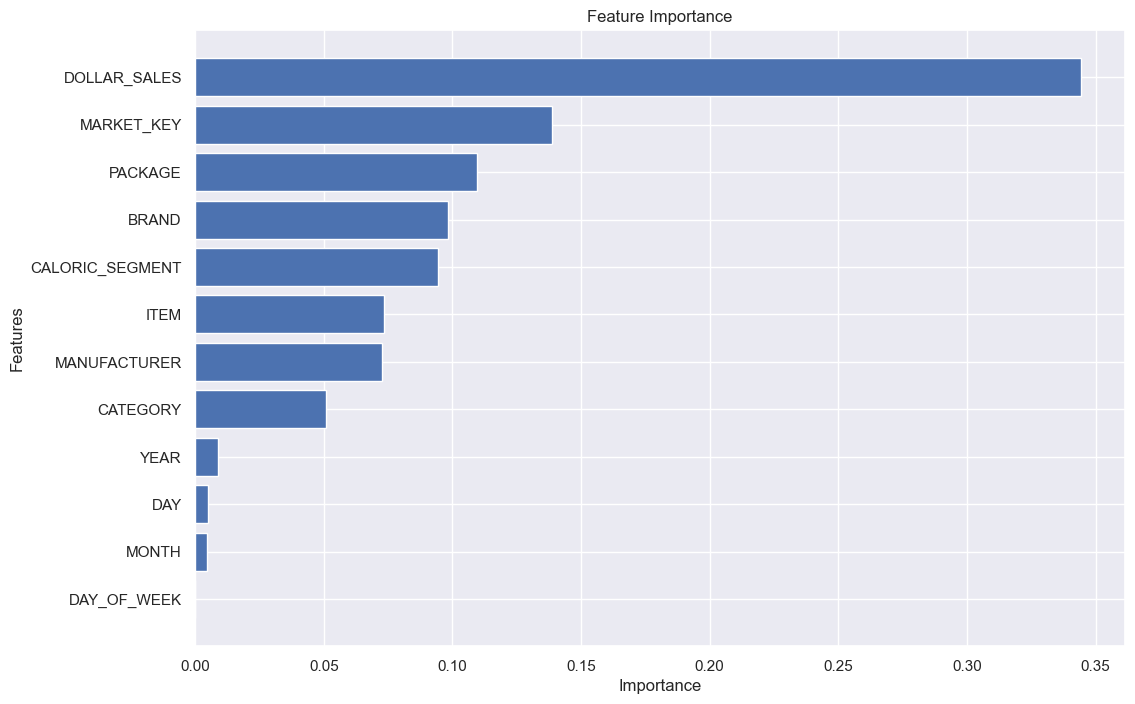

In [75]:
# feature importance
features = X_train.columns

# get feature importances from your trained model
feature_importance = model_rm.feature_importances_

# create a pandas DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print the DataFrame
print(importance_df)

# Plot feature importance using a bar plot
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()

The horizontal bar chart illustrates the feature importance from an XGBoost model, ranking the predictors by their significance in forecasting the target variable. "DOLLAR_SALES" emerges as the most influential feature, while "MONTH" and "DAY_OF_WEEK" have minimal impact, indicating they're less critical for the model's predictions. The visualization emphasizes the varying degrees of relevance among features, highlighting where the model is deriving its predictive power.

### Learning Curve

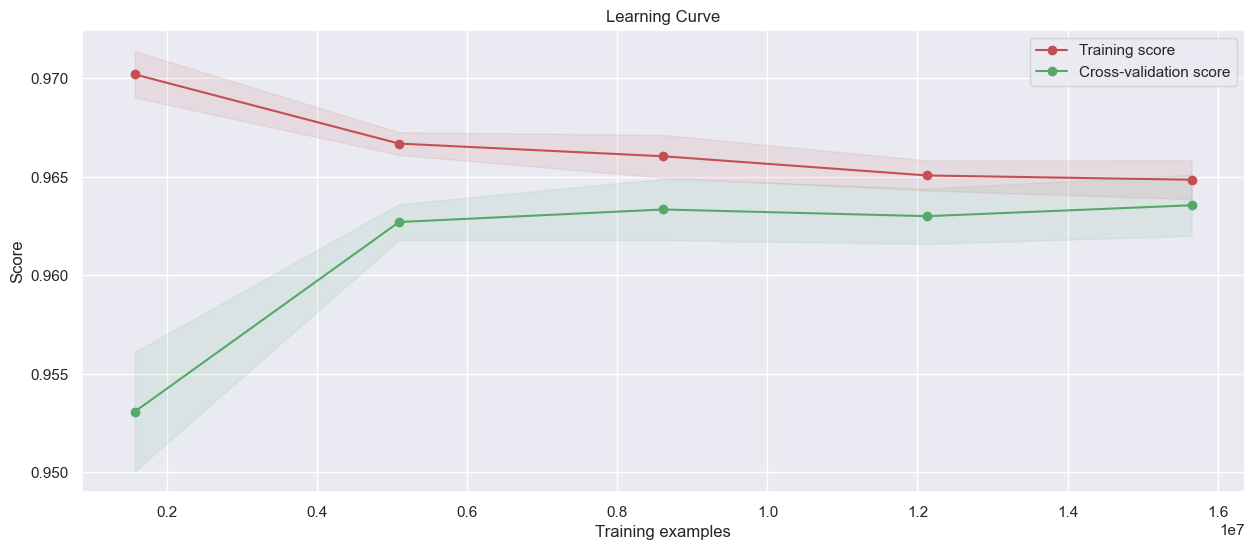

In [76]:
# look at the learning curve of the model

from sklearn.model_selection import learning_curve

# define cross-validation strategy
cv = 5

# generate the learning curve
train_sizes, train_scores, test_scores = learning_curve(model_rm, X_train, y_train, cv=cv)

# calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# plot the learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")

# plot the mean train and test scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# plot the standard deviation of the train and test scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()

The learning curve displayed in the graph provides insights into the model's performance relative to the training size. As the number of training examples increases, we observe a slight decrease in training score and a corresponding increase in cross-validation score, indicating effective learning and generalization. The convergence of the training and cross-validation scores suggests that the model is neither underfitting nor overfitting. Moreover, the scores plateau as the training size grows, implying that additional data may not significantly enhance the model's performance. The relatively narrow confidence intervals, shown by the shaded areas, highlight the stability and reliability of the model's predictive power across different training subsets.

### Cross-Validation Score

Cross-validation is a technique used in machine learning to assess the performance and generalization ability of a model. It involves partitioning the dataset into multiple subsets, training the model on a portion of the data, and evaluating it on the remaining unseen data. This process is repeated multiple times, allowing for more reliable estimates of model performance and reducing the risk of overfitting by testing on different subsets of the data. Cross-validation helps ensure that the model's performance is robust and representative across various data samples, providing more confidence in its ability to generalize to unseen data.

In [56]:
# setting up the parameters to check for overfitting
train_predictions = model_rm.predict(X_train)
test_predictions = model_rm.predict(X_test)

train_error = mean_absolute_error(y_train, train_predictions)
test_error = mean_absolute_error(y_test, test_predictions)

print(f'Training error: {train_error}')
print(f'Test error: {test_error}')

Training error: 23.87969398498535
Test error: 24.02752685546875


The "training error" refers to the mean absolute error (MAE) obtained when the model is evaluated on the training dataset, while the "test error" represents the MAE when the model is evaluated on the separate, unseen test dataset. In this instance, the training error is 23.87, and the test error is 24.02. These values indicate the average absolute difference between the predicted and actual values in the respective datasets. Comparing the training and test errors helps assess the model's ability to generalize to new data; ideally, the test error should be similar to or slightly higher than the training error, indicating good generalization performance.

### Predicted vs Actual Values

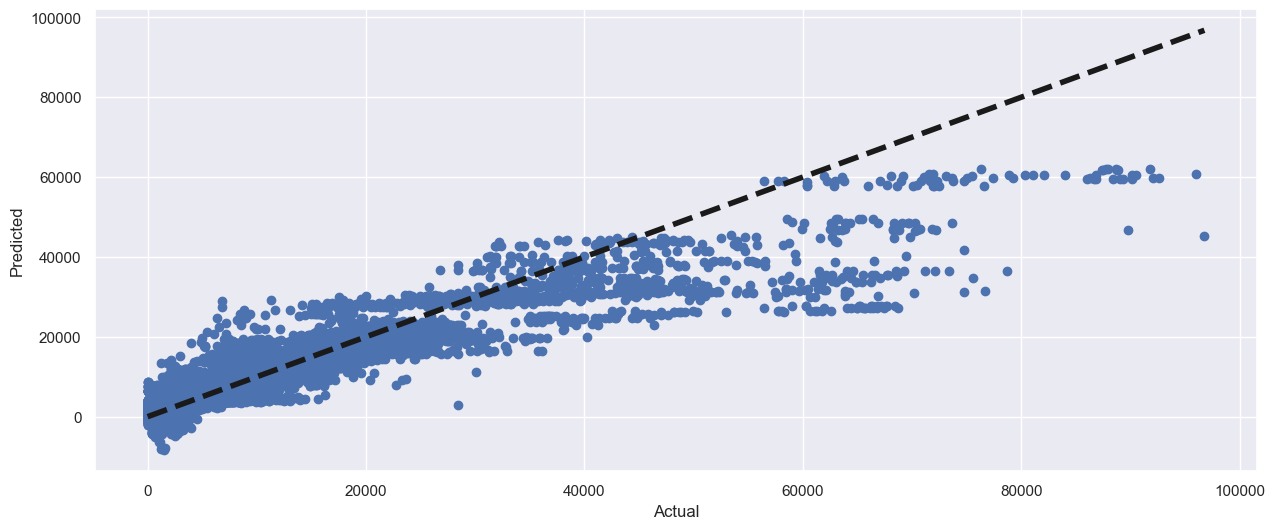

In [78]:
# plotting predicted vs. actual values

y_pred = model_bm.predict(X_test)

# create a scatter plot
plt.scatter(y_test, y_pred)

# create a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

# set labels
plt.xlabel('Actual')
plt.ylabel('Predicted')

# show the plot
plt.show()

This plot is a scatter plot comparing predicted values to actual values, a common way to evaluate the performance of a regression model. On the x-axis, we have the actual values, and on the y-axis, we have the predicted values. Each dot represents an observation from the dataset where the model made a prediction.

The dashed line represents the line of perfect prediction, where the predicted values exactly match the actual values. The closer the dots are to this line, the more accurate the predictions are.In this plot, we can see that most of the dots are clustered around the line, which suggests that the model has a good fit to the data.

## 9.3. Model Performance Review <a id='model_performance_review'></a>

XGBoost is preferred over Random Forest due to its significantly lower Mean Absolute Error (MAE) and higher R-squared value, indicating more accurate and reliable predictions with a better fit to the data. Its advantages include efficiency in handling large datasets, built-in regularization to reduce overfitting, flexibility across various predictive modeling problems, capability to handle missing data, and scalability for distributed computing. These features make XGBoost a versatile and powerful tool for predictive modeling, offering superior performance and computational efficiency, which is crucial for achieving high accuracy in our modeling task.



###  9.3.1. RMSE and MAE <a id='rmse_and_mae'></a>


The achieved RMSE of 169.29 and MAE of 24.02 on the test dataset indicate the model's ability to make predictions with a high level of accuracy. The RMSE measures the average magnitude of errors between predicted and actual values, providing insight into the model's overall performance. Similarly, the MAE represents the average absolute difference between predicted and actual values, offering a more interpretable measure of prediction accuracy. These metrics being relatively low suggest that the model's predictions closely align with the true values, signifying its effectiveness in forecasting sales.

###  9.3.2. Execution Time <a id='execution_time'></a>

The execution time of 141.74 seconds highlights the computational cost required for training and evaluating the model. Despite this, the time is reasonable considering the complexity of the model and the size of the dataset. It indicates that the model can be trained and evaluated efficiently, making it practical for real-world applications.

###  9.3.3. R-Squared <a id='r_squared'></a>

A R-squared value of 0.96 indicates that approximately 96% of the variance in the target variable (sales) can be explained by the independent variables (features) included in the model. In other words, the model captures a large portion of the variability in sales data, suggesting a strong relationship between the predictors and the target. This high R-squared value reflects the model's ability to accurately predict sales patterns and effectively capture the underlying trends and factors influencing sales outcomes. Combined with the low RMSE and MAE values, which indicate minimal prediction errors, the model demonstrates exceptional performance in sales forecasting. Such high predictive accuracy, along with reasonable computational cost, makes the model well-suited for practical deployment, enabling businesses to make informed decisions and optimize sales strategies with confidence.


###  9.3.4. Train and Test set Performance <a id='train_and_test_set_performance'></a>

The training error of 23.87 and the test error of 24.02, alongside a high R-squared value and low RMSE and MAE on the test dataset, indicate that the model demonstrates consistent and robust performance in predicting sales, without showing signs of overfitting. This consistency between training and test errors reflects the model's ability to generalize well to new data, affirming its effectiveness and suitability for practical deployment in real-world sales forecasting scenarios. These metrics collectively validate the model's accuracy in guiding business decisions and strategies.

Notably, the features MARKET_KEY and PACKAGE emerged as the most influential predictors, underscoring their importance in sales prediction.Overall, the combination of accurate prediction metrics and reasonable execution time underscores the model's robustness and suitability for deployment in sales forecasting tasks.

## 10. Business Problems and Results <a id='business_problems_and_results'></a>

### Question 1
1. Item Description: Diet Smash Plum 11Small 4One
    1. Caloric Segment: Diet
    2. Market Category: SSD
    3. Manufacturer: Swire-CC
    4. Brand: Diet Smash
    5. Package Type: 11Small 4One
    6. Flavor: ‘Plum’  
  
Which 13 weeks of the year would this product perform best in the market? What is the forecasted demand, in weeks, for those 13 weeks?

In [57]:
# inverse transform the categorical features X_test
for feature in categorical_features:
    X_test[feature] = label_encoders[feature].inverse_transform(X_test[feature])

This code chunk is reverting the label encoding transformation applied to categorical features in the test dataset back to their original categorical values. It iterates through each feature in the list of categorical features (categorical_features). For each feature, it retrieves the corresponding label encoder from the label_encoders dictionary using the feature name as the key. Then, it applies the inverse_transform method of the label encoder to the corresponding column in the test dataset (X_test) to convert the encoded numerical values back to their original categorical values. This process ensures that the categorical features are restored to their original form for further analysis or interpretation.

In [58]:
# inverse transform the categorical features X_train
for feature in categorical_features:
    X_train[feature] = label_encoders[feature].inverse_transform(X_train[feature])

The same inverse transformation has also been done for X_train data set.

In [53]:
X_test = pd.read_parquet('X_test.parquet')

In [55]:
# Create a 'DATE' column from 'YEAR', 'MONTH', and 'DAY'
X_test['DATE'] = pd.to_datetime(X_test[['YEAR', 'MONTH', 'DAY']])

# Extract the week of the year from the 'DATE' column
X_test['WEEK_OF_YEAR'] = X_test['DATE'].dt.isocalendar().week

# Convert the 'WEEK_OF_YEAR' column to a list
weeks_of_year = X_test['WEEK_OF_YEAR'].tolist()

# Convert the 'WEEK_OF_YEAR' column to a numpy array
weeks_of_year = X_test['WEEK_OF_YEAR'].to_numpy()


# Extract weeks of year and predictions from X_test
weeks_of_year_test = X_test['WEEK_OF_YEAR'].tolist()
preds_rm_test = X_test['PREDICTIONS'].tolist()

# Create a DataFrame with weeks of year and predictions
df = pd.DataFrame({
    'week_of_year': weeks_of_year_test,
    'predicted_demand': preds_rm_test
})

# Aggregate predictions by week of year
df_agg = df.groupby('week_of_year')['predicted_demand'].sum().reset_index()


In [62]:
# define the new product features
new_product = {
    'CALORIC_SEGMENT': 'DIET/LIGHT',
    'CATEGORY': 'SSD',
    'MANUFACTURER': 'SWIRE-CC',
    'BRAND': 'DIET SMASH'
}

# filter for the specific product features
for feature, value in new_product.items():
    X_test_q1 = X_test[X_test[feature] == value]
    
# sort by 'PREDICTIONS' in descending order and select the top 13 rows
top_13_weeks_df = X_test_q1.sort_values('PREDICTIONS', ascending=False).head(20)

# print the weeks and predicted demand
for i, row in top_13_weeks_df.iterrows():
    print(f"Week: {row['WEEK_OF_YEAR']}, Predicted Demand: {row['PREDICTIONS']}")


Week: 30, Predicted Demand: 682.7181396484375
Week: 42, Predicted Demand: 513.7989501953125
Week: 2, Predicted Demand: 376.6430969238281
Week: 27, Predicted Demand: 359.1732177734375
Week: 23, Predicted Demand: 333.6736145019531
Week: 27, Predicted Demand: 290.2669677734375
Week: 52, Predicted Demand: 242.43812561035156
Week: 21, Predicted Demand: 200.6352081298828
Week: 28, Predicted Demand: 189.1199951171875
Week: 40, Predicted Demand: 182.80880737304688
Week: 33, Predicted Demand: 180.04769897460938
Week: 30, Predicted Demand: 177.42127990722656
Week: 32, Predicted Demand: 171.7710723876953
Week: 26, Predicted Demand: 162.5518035888672
Week: 50, Predicted Demand: 154.95950317382812
Week: 25, Predicted Demand: 151.0269775390625
Week: 34, Predicted Demand: 151.0191650390625
Week: 43, Predicted Demand: 150.81442260742188
Week: 24, Predicted Demand: 148.1294708251953
Week: 29, Predicted Demand: 147.32940673828125


In [65]:
# Check if 'YEAR' is not in DataFrame columns (implying 'YEAR' and 'WEEK_OF_YEAR' might be set as the index)
if 'YEAR' not in X_test_q1.columns:
    # If 'YEAR' is part of the index, reset the index to make 'YEAR' and 'WEEK_OF_YEAR' columns again
    X_test_q1 = X_test_q1.reset_index()

# Set 'YEAR' and 'WEEK_OF_YEAR' as the DataFrame index for rolling operation
X_test_q1 = X_test_q1.set_index(['YEAR', 'WEEK_OF_YEAR'])

# Calculate rolling sum of 'PREDICTIONS' over a 13-week window, grouped by 'YEAR'
rolling_sum = X_test_q1['PREDICTIONS'].groupby(level=0).rolling(window=13).sum()

# Reset the index of the rolling sum result, dropping 'YEAR' to avoid duplicate columns on merge
rolling_sum = rolling_sum.reset_index(level=0, drop=True)

# Assign calculated rolling sum values back to 'X_test_q1' DataFrame, bypassing index alignment issues
X_test_q1['ROLLING_SUM'] = rolling_sum.values

# Reset index of 'X_test_q1' to turn 'YEAR' and 'WEEK_OF_YEAR' back into columns for easy access
X_test_q1 = X_test_q1.reset_index()

# Find the maximum rolling sum value within the 'ROLLING_SUM' column
max_demand = X_test_q1['ROLLING_SUM'].max()

# Identify the 'YEAR' and 'WEEK_OF_YEAR' corresponding to the maximum 'ROLLING_SUM' value
max_info = X_test_q1[X_test_q1['ROLLING_SUM'] == max_demand][['YEAR', 'WEEK_OF_YEAR']].iloc[0]
max_year, max_week = max_info['YEAR'], max_info['WEEK_OF_YEAR']

# Print a summary of the top total predicted demand for any 13-week period, including starting week and year
print(f"The product would perform best starting from week {max_week - 12}.")


The product would perform best starting from week 32.


In [64]:
# Further filter to include only weeks from 32 to 44
X_test_q1_filtered_weeks = X_test_q1[X_test_q1['WEEK_OF_YEAR'].between(32, 44)]

# Sort by 'PREDICTIONS' in descending order and select the top 13 rows (or as needed)
top_13_weeks_df = X_test_q1_filtered_weeks.sort_values('PREDICTIONS', ascending=False).head(13)

# Print the weeks and predicted demand
for i, row in top_13_weeks_df.iterrows():
    print(f"Week: {row['WEEK_OF_YEAR']}, Predicted Demand: {row['PREDICTIONS']}")


Week: 42, Predicted Demand: 513.7989501953125
Week: 40, Predicted Demand: 182.80880737304688
Week: 33, Predicted Demand: 180.04769897460938
Week: 32, Predicted Demand: 171.7710723876953
Week: 34, Predicted Demand: 151.0191650390625
Week: 43, Predicted Demand: 150.81442260742188
Week: 42, Predicted Demand: 138.68016052246094
Week: 40, Predicted Demand: 120.3885726928711
Week: 43, Predicted Demand: 118.63524627685547
Week: 39, Predicted Demand: 115.37298583984375
Week: 41, Predicted Demand: 109.02398681640625
Week: 40, Predicted Demand: 105.83379364013672
Week: 32, Predicted Demand: 105.53740692138672


Based on the rolling window calculation and its resulting top total predicted demand, **The product "Diet Smash Plum 11Small 4One" is forecasted to perform best in the market during 13 weeks starting from week 32 of the year**. This specific timeframe indicates a concentrated period of highest demand,for those 13 weeks.

To clarify, a rolling window analysis helps identify periods with the highest aggregated demand, providing insight into seasonal trends, consumer preferences, or other factors that might influence sales. In this case, starting from week 32 and spanning the next 12 weeks( till week 43) suggests that the late summer through autumn might be the peak season for this product, reflecting potential seasonal influences on consumer behavior toward "DIET/LIGHT" category products. This period could be crucial for marketing, supply chain planning, and sales strategies to maximize the product's market performance.

### Question 2
2. Item Description: Sparkling Jacceptabletlester Avocado 11Small MLT
    1. Caloric Segment: Regular
    2. Market Category: SSD
    3. Manufacturer: Swire-CC
    4. Brand: Sparkling Jacceptabletlester
    5. Package Type: 11Small MLT
    6. Flavor: ‘Avocado’  
  
Swire plans to release this product 2 weeks before Easter and two weeks post Easter. What will the forecasted demand be, in weeks, for this product?

In [64]:
# Define the product features based on the item description
new_product_2 = {
    'CALORIC_SEGMENT': 'REGULAR',
    'CATEGORY': 'SSD',
    'MANUFACTURER': 'SWIRE-CC',
    'BRAND': 'SPARKLING JACCEPTABLETLESTER'
}

In [65]:
# Assuming we have the week of the year for Easter
easter_week = 15

# Filter for the specific product features
X_test_filtered = X_test.copy()
for feature, value in new_product_2.items():
    X_test_filtered = X_test_filtered[X_test_filtered[feature] == value]

# Calculate the forecasted demand around Easter (2 weeks before and after)
# We will have to make sure we handle year transitions if Easter is close to the start or end of a year
weeks_around_easter = list(range(easter_week - 2, easter_week + 3))  # This might include weeks from the previous or next year

# Filter rows for the weeks around Easter
easter_demand_df = X_test_filtered[X_test_filtered['WEEK_OF_YEAR'].isin(weeks_around_easter)]

# Assuming 'PREDICTIONS' column has the forecasted demand
forecasted_demand = easter_demand_df.groupby('WEEK_OF_YEAR')['PREDICTIONS'].sum()

# Print the forecasted demand for each week
for week, demand in forecasted_demand.items():
    print(f"Week: {week}, Forecasted Demand: {demand}")


Week: 13, Forecasted Demand: 41193.59765625
Week: 14, Forecasted Demand: 39423.13671875
Week: 15, Forecasted Demand: 41454.03515625
Week: 16, Forecasted Demand: 36848.61328125
Week: 17, Forecasted Demand: 38416.734375


Based on the output if Swire plans to release their product 2 weeks prior to Easter and 2 weeks post Easter, the forecasted demand, in weeks, for this product is as follows:

- Week 13 (2 weeks before Easter): Forecasted Demand of 41,194
- Week 14 (1 week before Easter): Forecasted Demand of 39,423
- Easter Week 15: Forecasted Demand of 41,454
- Week 16 (1 week after Easter): Forecasted Demand of 36,849
- Week 17 (2 weeks after Easter): Forecasted Demand of 38,417

These figures provide a weekly forecast around the Easter period, giving Swire insights into expected product performance and helping to inform inventory and marketing efforts for this timeframe.

### Question 3
3. Item Description: Diet Venomous Blast Energy Drink Kiwano 16 Liquid Small
    1. Caloric Segment: Diet
    2. Market Category: Energy
    3. Manufacturer: Swire-CC
    4. Brand: Venomous Blast
    5. Package Type:  16 Liquid Small
    6. Flavor: ’Kiwano’
  
Which 13 weeks of the year would this product perform best in the market? What is the forecasted demand, in weeks, for those 13 weeks?

In [67]:
# define the new product features
new_product_3 = {
    'CALORIC_SEGMENT': 'DIET/LIGHT',
    'CATEGORY': 'ENERGY',
    'MANUFACTURER': 'SWIRE-CC',
    'BRAND': 'VENOMOUS BLAST'
}

# filter for the specific product features
for feature, value in new_product_3.items():
    X_test_q3 = X_test[X_test[feature] == value]

# sort by 'PREDICTIONS' in descending order and select the top 13 rows
top_13_weeks_df_q3 = X_test_q3.sort_values('PREDICTIONS', ascending=False).head(13)

# print the weeks and predicted demand
for i, row in top_13_weeks_df_q3.iterrows():
    print(f"Week: {row['WEEK_OF_YEAR']}, Predicted Demand: {row['PREDICTIONS']}")

Week: 50, Predicted Demand: 2680.945068359375
Week: 49, Predicted Demand: 2671.94677734375
Week: 9, Predicted Demand: 2515.490966796875
Week: 50, Predicted Demand: 2477.495849609375
Week: 50, Predicted Demand: 2422.840576171875
Week: 51, Predicted Demand: 2304.837890625
Week: 6, Predicted Demand: 2302.902099609375
Week: 52, Predicted Demand: 2221.073974609375
Week: 30, Predicted Demand: 2165.3427734375
Week: 14, Predicted Demand: 2152.3251953125
Week: 4, Predicted Demand: 2130.777587890625
Week: 13, Predicted Demand: 2126.743408203125
Week: 37, Predicted Demand: 2114.988525390625


In [68]:
# Check if 'YEAR' and 'WEEK_OF_YEAR' are not already set as the index, to avoid repeating this operation
if 'YEAR' not in X_test_q3.columns:
    # If 'YEAR' and 'WEEK_OF_YEAR' are not in the columns, it means they are set as the index, so reset the index
    X_test_q3 = X_test_q3.reset_index()

# Set 'YEAR' and 'WEEK_OF_YEAR' as the DataFrame's index since they uniquely identify each row
X_test_q3 = X_test_q3.set_index(['YEAR', 'WEEK_OF_YEAR'])

# Perform a rolling sum of 'PREDICTIONS' within each 'YEAR', using a 13-week window for the sum
# This is grouped by 'YEAR' since it's part of the multi-level index
rolling_sum_q3 = X_test_q3['PREDICTIONS'].groupby(level=0).rolling(window=13).sum()

# Reset the index of the rolling sum result, dropping 'YEAR' from the index to avoid duplication errors when merging
rolling_sum_q3 = rolling_sum_q3.reset_index(level=0, drop=True)

# Assign the rolling sum values back to the 'ROLLING_SUM' column in X_test_q3, using values to bypass potential index mismatch
X_test_q3['ROLLING_SUM'] = rolling_sum_q3.values

# Reset the index to turn 'YEAR' and 'WEEK_OF_YEAR' back into columns, making them accessible for further operations
X_test_q3 = X_test_q3.reset_index()

# Find the maximum value within the 'ROLLING_SUM' column to identify the peak demand over a 13-week period
max_demand_q3 = X_test_q3['ROLLING_SUM'].max()

# Locate the row in X_test_q3 that corresponds to the maximum 'ROLLING_SUM', extracting its 'YEAR' and 'WEEK_OF_YEAR'
max_info_q3 = X_test_q3[X_test_q3['ROLLING_SUM'] == max_demand_q3][['YEAR', 'WEEK_OF_YEAR']].iloc[0]
max_year_q3, max_week_q3 = max_info_q3['YEAR'], max_info_q3['WEEK_OF_YEAR']

# Check if the calculated starting week is less than 1, indicating it falls into the previous year
if max_week_q3 - 12 < 1:
    # Calculate how many weeks into the previous year the starting week would be
    adjusted_start_week = 52 + (max_week_q3 - 12) # Assuming a standard year with 52 weeks
    adjusted_start_year = max_year_q3 - 1
    print(f"The product would perform best starting from week {adjusted_start_week}.")
else:
    print(f"The product would perform best starting from week {max_week_q3-12}.")


The product would perform best starting from week 47.


Based on the output ,**If Swire plans to release the product "Diet Venomous Blast Energy Drink Kiwano 16 Liquid Small" for a 13-week period, the forecasted demand, following historical trends, would be highest from week 47 which spans from late fall into winter, crossing over into the following year**. This suggests that if the product were to be released during the same seasonal timeframe in the future, Swire could expect a similar demand pattern. The late fall to winter period likely captures key holiday sales and potentially colder weather, which may influence consumer behavior. However, this forecast assumes that past seasonal demand trends will apply to future releases, and actual demand may differ based on various market conditions and other factors at the time of the product's release.

### Question 4
4. Item Description: Diet Square Mulberries Sparkling Water 10Small MLT
    1. Caloric Segment: Diet
    2. Market Category: Sparkling Water
    3. Manufacturer: Swire-CC
    4. Brand: Square
    5. Package Type: 10Small MLT
    6. Flavor: ‘Mulberries
  
Swire plans to release this product for the duration of 1 year but only in the Northern region. What will the forecasted demand be, in weeks, for this product?

In [8]:
# Find unique combinations of 'Zip' and 'State'
unique_combinations = demoDF[['Zip', 'State']].drop_duplicates()

print("Unique combinations of Zip and State:")
print(unique_combinations)

# Perform left join to populate State values in Zipmap DataFrame
zipmap_st = pd.merge(zipmap, unique_combinations, how='left', left_on='ZIP_CODE',right_on='Zip')

zipmap_st.drop(columns=['Zip'], inplace=True)

Unique combinations of Zip and State:
        Zip State
0     85281    AZ
1     85705    AZ
2     85364    AZ
3     85301    AZ
4     85719    AZ
...     ...   ...
6547  82051    WY
6548  82055    WY
6549  82058    WY
6550  82063    WY
6551  82084    WY

[6552 rows x 2 columns]


In [9]:
# Defining regions
state_to_region = {
    'AZ': 'South',
    'CA': 'West',
    'CO': 'North',
    'ID': 'North',
    'KS': 'Midwest',
    'NE': 'Midwest',
    'NM': 'South',
    'NV': 'West',
    'OR': 'West',
    'SD': 'Midwest',
    'UT': 'North',
    'WA': 'West',
    'WY': 'North'
}

# create the 'Region' column
zipmap_st['Region'] = zipmap_st['State'].map(state_to_region)

In [10]:
# Convert the 'MARKET_KEY' column in the 'zipmap_st' DataFrame to an integer data type (int32) for optimized memory usage and performance
zipmap_st['MARKET_KEY'] = zipmap_st['MARKET_KEY'].astype('int32')

In [12]:
X_test_pq = pd.read_parquet('X_test.parquet')

In [13]:
# define the new product features
new_product_q4 = {
    'CALORIC_SEGMENT': 'DIET/LIGHT',
    'CATEGORY': 'SPARKLING WATER',
    'MANUFACTURER': 'SWIRE-CC',
    'BRAND': 'SQUARE'  
}

# filter for the specific product features
for feature, value in new_product_q4.items():
    X_test_temp = X_test_pq[X_test_pq[feature] == value]

In [14]:
# merge the X_test DataFrame with the zipmap_st DataFrame
X_test_q4 = pd.merge(X_test_temp, zipmap_st[['MARKET_KEY', 'Region']], on='MARKET_KEY', how='left')

In [15]:
# Remove duplicate rows from X_test_q4
X_test_q4 = X_test_q4.drop_duplicates()

# Reset index after removing duplicates
X_test_q4.reset_index(drop=True, inplace=True)

In [16]:
# Filter the DataFrame to include only rows where the product is available in the 'North' region
X_test_q4 = X_test_q4[X_test_q4['Region'] == 'North']

In [17]:
# sort by 'PREDICTIONS' in descending order and select the top 13 rows
top_52_weeks_df_q4 = X_test_q4.sort_values('PREDICTIONS', ascending=False).head(52)

# print the weeks and predicted demand
for i, row in top_52_weeks_df_q4.iterrows():
    print(f"Week: {row['WEEK_OF_YEAR']}, Predicted Demand: {row['PREDICTIONS']}")

Week: 18, Predicted Demand: 146.98387145996094
Week: 17, Predicted Demand: 129.34521484375
Week: 27, Predicted Demand: 107.42112731933594
Week: 26, Predicted Demand: 107.32579803466797
Week: 30, Predicted Demand: 106.18502807617188
Week: 28, Predicted Demand: 106.11780548095703
Week: 19, Predicted Demand: 104.39263153076172
Week: 22, Predicted Demand: 104.315673828125
Week: 24, Predicted Demand: 103.95907592773438
Week: 9, Predicted Demand: 101.57310485839844
Week: 12, Predicted Demand: 97.44161987304688
Week: 11, Predicted Demand: 96.18305206298828
Week: 25, Predicted Demand: 93.73836517333984
Week: 10, Predicted Demand: 89.61363220214844
Week: 38, Predicted Demand: 89.39723205566406
Week: 38, Predicted Demand: 89.39723205566406
Week: 26, Predicted Demand: 88.563232421875
Week: 43, Predicted Demand: 78.8673324584961
Week: 18, Predicted Demand: 78.21814727783203
Week: 8, Predicted Demand: 78.10385131835938
Week: 28, Predicted Demand: 77.80004119873047
Week: 40, Predicted Demand: 75.306

The forecasted demand for "Diet Square Mulberries Sparkling Water 10Small MLT" in the Northern region is presented over a 52-week span as shown above, revealing insights into weekly demand variability. Peak demand is anticipated around Week 18, signaling a critical period for focused marketing and inventory adjustments. This data underlines the importance of strategic planning in production, distribution, and promotional activities to leverage high-demand weeks effectively, ensuring the product's successful market performance during its year-long launch in the Northern region.

### Question 5
5. Item Description: Greetingle Health Beverage Woodsy Yellow .5L 12One Jug
    1. Caloric Segment: Regular
    2. Market Category: ING Enhanced Water
    3. Manufacturer: Swire-CC
    4. Brand: Greetingle 
    5.Package Type: .5L 12One Jug
    6. Flavor: ‘Woodsy Yellow’ 
    
Swire plans to release this product for 13 weeks, but only in one region. Which region would it perform best in? 

In [25]:
# define the new product features
new_product_q5 = {
    'CALORIC_SEGMENT': 'REGULAR',
    'CATEGORY': 'ING ENHANCED WATER',
    'MANUFACTURER': 'SWIRE-CC',
    'BRAND': 'GREETINGLE'  
}

# filter for the specific product features
for feature, value in new_product_q5.items():
    X_test_q5 = X_test_pq[X_test_pq[feature] == value]

In [26]:
# merge the X_test DataFrame with the zipmap_st DataFrame
X_test_q5 = pd.merge(X_test_q5, zipmap_st[['MARKET_KEY', 'Region']], on='MARKET_KEY', how='left')


# Remove duplicate rows from X_test_q4
X_test_q5 = X_test_q5.drop_duplicates()

# Reset index after removing duplicates
X_test_q5.reset_index(drop=True, inplace=True)

In [27]:
# sort by 'PREDICTIONS' in descending order and select the top 13 rows
good_region_q5 = X_test_q5.sort_values('PREDICTIONS', ascending=False).head(13)

# print the weeks and predicted demand
for i, row in good_region_q5.iterrows():
    print(f"Region: {row['Region']}, Predicted Demand: {row['PREDICTIONS']}")

Region: Midwest, Predicted Demand: 3490.53515625
Region: Midwest, Predicted Demand: 3465.08154296875
Region: Midwest, Predicted Demand: 3465.08154296875
Region: Midwest, Predicted Demand: 3459.9169921875
Region: Midwest, Predicted Demand: 3399.214111328125
Region: Midwest, Predicted Demand: 2791.075927734375
Region: Midwest, Predicted Demand: 2776.964599609375
Region: Midwest, Predicted Demand: 2775.31689453125
Region: Midwest, Predicted Demand: 2775.31689453125
Region: Midwest, Predicted Demand: 2773.534912109375
Region: Midwest, Predicted Demand: 2735.5185546875
Region: Midwest, Predicted Demand: 2548.3505859375
Region: Midwest, Predicted Demand: 2533.4697265625


Based on the output, it appears that the product "Greetingle Health Beverage Woodsy Yellow .5L 12One Jug" is predicted to perform best in the "Midwest" region. This inference is drawn from the fact that all the top 13 predicted demand values belong to the "Midwest" region, indicating a strong market demand for the product in this region compared to others. Therefore, it would be advisable for Swire to release the product exclusively in the Midwest region for optimal performance.

### Question 6
6. Item Description: Diet Energy Moonlit Casava 2L Multi Jug
    1. Caloric Segment: Diet
    2. Market Category: Energy
    3. Manufacturer: Swire-CC
    4. Brand: Diet Moonlit
    5. Package Type: 2L Multi Jug
    6. Flavor: ‘Cassava’   
    
Swire plans to release this product for 6 months. What will the forecasted demand be, in weeks, for this product?


In [75]:
# Define the new product features for 'Diet Energy Moonlit Cassava 2L Multi Jug'
new_product_cassava = {
    'CALORIC_SEGMENT': 'DIET/LIGHT',
    'MANUFACTURER':'SWIRE-CC',
    'CATEGORY':'ENERGY',
    'BRAND': 'MOONLIT'# Assuming this is already encoded or transformed as needed# And so on
}

# filter for the specific product features
for feature, value in new_product_cassava.items():
    X_test_q6 = X_test[X_test[feature] == value]
    

# sort by 'PREDICTIONS' in descending order and select the top 26 rows
top_26_weeks_df = X_test_q6.sort_values('PREDICTIONS', ascending=False).head(26)

# print the weeks and predicted demand
for i, row in top_26_weeks_df.iterrows():
    print(f"Week: {row['WEEK_OF_YEAR']}, Predicted Demand: {row['PREDICTIONS']}")

Week: 21, Predicted Demand: 6099.5712890625
Week: 5, Predicted Demand: 5740.59716796875
Week: 18, Predicted Demand: 5670.01904296875
Week: 24, Predicted Demand: 5535.00048828125
Week: 35, Predicted Demand: 5531.94189453125
Week: 23, Predicted Demand: 5499.90234375
Week: 40, Predicted Demand: 5414.537109375
Week: 51, Predicted Demand: 5397.06201171875
Week: 37, Predicted Demand: 5385.771484375
Week: 46, Predicted Demand: 5372.931640625
Week: 34, Predicted Demand: 5364.4921875
Week: 24, Predicted Demand: 5281.9189453125
Week: 12, Predicted Demand: 5243.22607421875
Week: 16, Predicted Demand: 5220.3291015625
Week: 45, Predicted Demand: 5173.56689453125
Week: 27, Predicted Demand: 5060.6845703125
Week: 4, Predicted Demand: 5011.13671875
Week: 5, Predicted Demand: 4986.0458984375
Week: 30, Predicted Demand: 4985.41943359375
Week: 14, Predicted Demand: 4960.0185546875
Week: 9, Predicted Demand: 4841.95556640625
Week: 23, Predicted Demand: 4791.1455078125
Week: 4, Predicted Demand: 4780.98095

In [76]:
# Assuming 'WEEK_OF_YEAR' is a column that, combined with 'YEAR', uniquely identifies each row
# Ensure X_test_q1 is not already set with 'YEAR' and 'WEEK_OF_YEAR' as its index to avoid repeating the operation
if 'YEAR' not in X_test_q6.columns:
    X_test_q6 = X_test_q6.reset_index()

X_test_q6 = X_test_q6.set_index(['YEAR', 'WEEK_OF_YEAR'])

# Perform the rolling sum. Note: No need to group by 'YEAR' again since it's part of the index
rolling_sum_q6 = X_test_q6['PREDICTIONS'].groupby(level=0).rolling(window=26).sum()

# Reset the index without inserting it back into the DataFrame to avoid the 'YEAR' duplication error
rolling_sum_q6 = rolling_sum_q6.reset_index(level=0, drop=True)

# Assign the rolling sum back to X_test_q1 without the 'YEAR' conflict
X_test_q6['ROLLING_SUM'] = rolling_sum_q6.values  # Use .values to ignore index alignment issues

# Reset index to make 'YEAR' and 'WEEK_OF_YEAR' columns available again for filtering
X_test_q6 = X_test_q6.reset_index()

# Now, find the maximum value of 'ROLLING_SUM' and its corresponding 'YEAR' and 'WEEK_OF_YEAR'
max_demand_q6 = X_test_q6['ROLLING_SUM'].max()
max_info_q6 = X_test_q6[X_test_q6['ROLLING_SUM'] == max_demand_q6][['YEAR', 'WEEK_OF_YEAR']].iloc[0]
max_year_q6, max_week_q6 = max_info_q6['YEAR'], max_info_q6['WEEK_OF_YEAR']

print(f"The product would perform best starting from week {max_week_q6 - 25}.")


The product would perform best starting from week 17.


Based on the output, **The forecasted demand for Swire's product - 'Diet Energy Moonlit Casava 2L Multi Jug', when planning to release it for a 6-month period, would be expected to follow the historical pattern observed from week 17 to week 42**. This suggests that if the product were to be released for a similar timeframe in the future, Swire could anticipate a comparable level of demand, spread out over the weeks from 17 to 42, aligning with the historical data's prediction. However, actual demand could vary due to different market conditions and other factors at the time of release.

### Question 7
7. Item Description: Peppy Gentle Drink Pink Woodsy .5L Multi Jug
    1. Caloric Segment: Regular
    2. Type: SSD
    3. Manufacturer: Swire-CC
    4. Brand: Peppy
    5. Package Type: .5L Multi Jug
    6. Flavor: ‘Pink Woodsy’
   
Swire plans to release this product in the Southern region for 13 weeks. What will the forecasted demand be, in weeks, for this product?


In [44]:
# define the new product features
new_product_q7 = {
    'CALORIC_SEGMENT': 'REGULAR',
    'CATEGORY': 'SSD',
    'MANUFACTURER': 'SWIRE-CC',
    'BRAND': 'PEPPY'  
}

# filter for the specific product features
for feature, value in new_product_q7.items():
    X_test_tem = X_test_pq[X_test_pq[feature] == value]

In [45]:
# merge the X_test DataFrame with the zipmap_st DataFrame
X_test_q7 = pd.merge(X_test_tem, zipmap_st[['MARKET_KEY', 'Region']], on='MARKET_KEY', how='left')


In [46]:
# Remove duplicate rows from X_test_q4
X_test_q7 = X_test_q7.drop_duplicates()

# Reset index after removing duplicates
X_test_q7.reset_index(drop=True, inplace=True)

In [47]:
# Filter the DataFrame to include only rows where the product is available in the 'South' region
X_test_q7 = X_test_q7[X_test_q7['Region'] == 'South']

In [48]:
# sort by 'PREDICTIONS' in descending order and select the top 13 rows
top_13_weeks_df_q7 = X_test_q7.sort_values('PREDICTIONS', ascending=False).head(13)

# print the weeks and predicted demand
for i, row in top_13_weeks_df_q7.iterrows():
    print(f"Week: {row['WEEK_OF_YEAR']}, Predicted Demand: {row['PREDICTIONS']}")

Week: 47, Predicted Demand: 5430.623046875
Week: 47, Predicted Demand: 5337.970703125
Week: 26, Predicted Demand: 5264.99560546875
Week: 47, Predicted Demand: 5158.4375
Week: 22, Predicted Demand: 5010.16552734375
Week: 27, Predicted Demand: 5008.0322265625
Week: 13, Predicted Demand: 4983.50927734375
Week: 17, Predicted Demand: 4982.33056640625
Week: 18, Predicted Demand: 4976.71728515625
Week: 1, Predicted Demand: 4964.58544921875
Week: 30, Predicted Demand: 4963.7509765625
Week: 21, Predicted Demand: 4956.41650390625
Week: 31, Predicted Demand: 4937.2900390625


Based on the output, if Swire plans to release the product "Peppy Gentle Drink Pink Woodsy .5L Multi Jug" in the Southern region for 13 weeks, the forecasted demand for this product, in weeks, is as shown above and it would be approximately 5035 units on an average for the 13 week period.

## 11. Team member's Contributions <a id='contri'></a>

Pavani:
- Joined datasets and interpreted plots, providing valuable insights into the data's relationships.
- Explored data columns and created insightful visualizations, greatly enhancing our understanding of the dataset.
- Contributed to the development of a Random Forest model and evaluated its effectiveness in addressing business challenges.
- Engaged in finding solutions to few of the business probelms.
- Took on a central role in the documentation process for the modeling file.
- Performed document proofreading, ensuring accuracy and clarity throughout the document.

Harichandana:
- Provided interpretation of plots and thoroughly explored various data columns, contributing to our in-depth analysis.
- Created visualizations and meticulously worked on the table of contents, ensuring the document's organization and readability.
- Conducted analysis on Regression models to determine their suitability for resolving business issues.
- Engaged in finding solutions to few of the business probelms.
- Played a pivotal role in the comprehensive documentation of the modeling process.
- Performed document proofreading, ensuring accuracy and clarity throughout the document.

Josh:
- Set up initial data and created the Parquet file, laying a solid foundation for our analysis.
- Handled missing data and identified outliers, ensuring data integrity and reliability.
- Engaged in the creation and evaluation of ARIMA and XGBoost models, assessing their applicability in tackling business challenges.
- Engaged in finding solutions to few of the business probelms.
- Was instrumental in the development and analytical assessment of the final model for the modeling process.
- Performed document proofreading, ensuring accuracy and clarity throughout the document.